In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
import pydotplus 
from IPython.display import Image

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_orng = pd.read_csv("wswd_dt_0807.csv",index_col = 0)
data = data_orng.copy()

## 1. Univariate screening and grouping，IV>0.02

In [3]:
#Univariate screening function
def screening(name, show = True, custom = None):
    st = pd.DataFrame()
    
    if isinstance(custom, pd.DataFrame):
        x = custom[name]
    else:
        x = data[name]
    
    if x.isnull().any():
        print('There is missing!')
        return 0,0
    else:
        x_cnt = x.value_counts()
        st['Count'] = x_cnt
        st['Tot Distr'] = x_cnt / x_cnt.sum()

        st['Goods'] = x[data['label'] == 0].value_counts()
        st['Distr Good'] = st['Goods'] / st['Goods'].sum()
        st['Bads'] = x[data['label'] == 1].value_counts()
        st['Distr Bad'] = st['Bads'] / st['Bads'].sum()

        st = st.fillna(0.0001) 
        #如果某组出现响应数为0，目前解决方法是人工设成0.0001，后续会根据实际情况调整分组消除0

        st['Bad rate'] = st['Bads'] / st['Count']

        st['WOE'] = np.log(st['Distr Good']/ st['Distr Bad'])

        IVi = (st['Distr Good'] - st['Distr Bad']) * st['WOE']
        IV = IVi.sum()

        st.index = list(st.index)
        
        st = st.sort_index()

        st = st.T
        st['Total'] = st.sum(axis = 1)
        st = st.T
        st.loc['Total','Bad rate'] = st.loc['Total','Bads'] / st.loc['Total','Count']
        st.loc['Total','WOE'] = 0

        ##if name in gpList:
        ##    xticks = gpDict[name] + ['Total']
        ##else:
        xticks = list(st.index[:-1])

        if show:
            print('Variable: ',name)
            display(st)
            print('Information Value = ',IV)

            plt.figure(figsize = (10,5))
            plt.grid(True)
            plt.bar(xticks, st['WOE'].values[:-1])
            plt.plot(xticks, st['WOE'].values[:-1],'r')
            plt.xticks(xticks)
            plt.xlabel(name,fontsize = 12)
            plt.ylabel('weight',fontsize = 12)
            plt.show()

        return st, IV

In [4]:
def useTree(name, depth, orng = True):
    if orng:
        dataUsed = data_orng
    else:
        dataUsed = data
    x = np.array([dataUsed[name].values]).T
    y = dataUsed['label'].values
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = depth)
    clf = clf.fit(x, y)
    dot_data = tree.export_graphviz(clf,filled=True,class_names = ['Survived', 'Died'])  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    display(Image(graph.create_png()))

In [5]:
gpDict = {} #存放分组加工对应的信息，变量名：信息
#分组加工默认将缺失值设为0，其他正常的组别按序从1开始赋值
run1Df = pd.DataFrame() #存放第一轮被选中的变量

### x1分析

Variable:  x1


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,2550.0,0.352356,2414.0,0.352666,136.0,0.346939,0.053333,0.016374
2,4687.0,0.647644,4431.0,0.647334,256.0,0.653061,0.054619,-0.008809
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.00014422972125065765


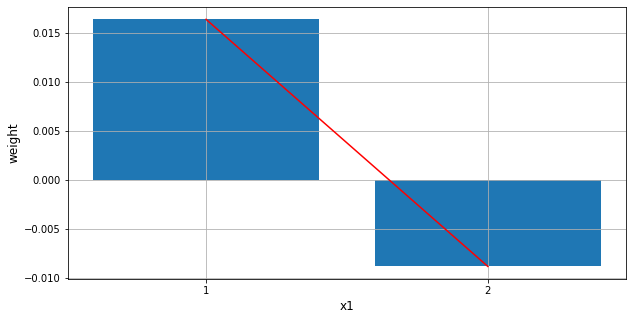

In [6]:
a = screening('x1')

IV不达标，不选。

### x2分析

Variable:  x2


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,6368.0,0.879923,6019.0,0.879328,349.0,0.890306,0.054805,-0.012407
2,869.0,0.120077,826.0,0.120672,43.0,0.109694,0.049482,0.095383
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.001183336187957987


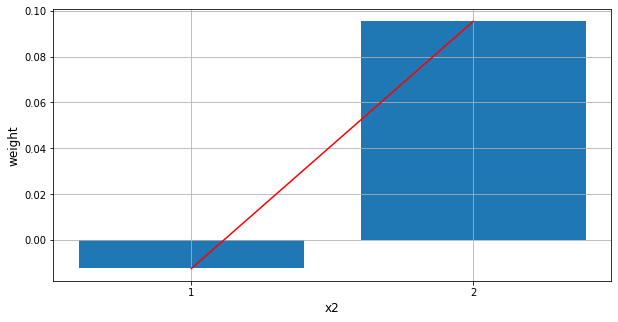

In [7]:
a = screening('x2')

IV不达标，不选。

### x3分析

Variable:  x3


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,267.0,0.036894,247.0,0.036085,20.0,0.051020,0.074906,-0.346356
2,694.0,0.095896,656.0,0.095836,38.0,0.096939,0.054755,-0.011437
3,402.0,0.055548,374.0,0.054638,28.0,0.071429,0.069652,-0.267961
4,714.0,0.098660,680.0,0.099343,34.0,0.086735,0.047619,0.135720
5,430.0,0.059417,408.0,0.059606,22.0,0.056122,0.051163,0.060213
6,484.0,0.066879,453.0,0.066180,31.0,0.079082,0.064050,-0.178107
7,1141.0,0.157662,1067.0,0.155880,74.0,0.188776,0.064855,-0.191471
8,806.0,0.111372,762.0,0.111322,44.0,0.112245,0.054591,-0.008255
9,989.0,0.136659,952.0,0.139080,37.0,0.094388,0.037412,0.387635
10,1310.0,0.181014,1246.0,0.182031,64.0,0.163265,0.048855,0.108799


Information Value =  0.03957546147402098


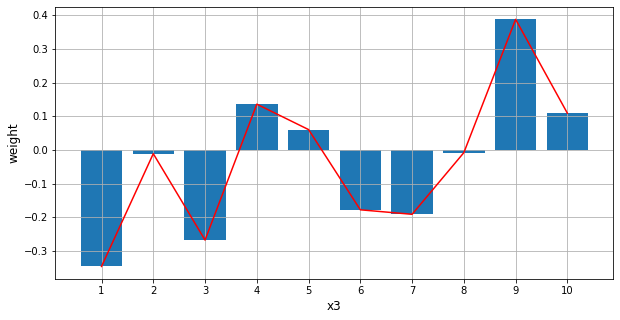

In [8]:
a = screening('x3')

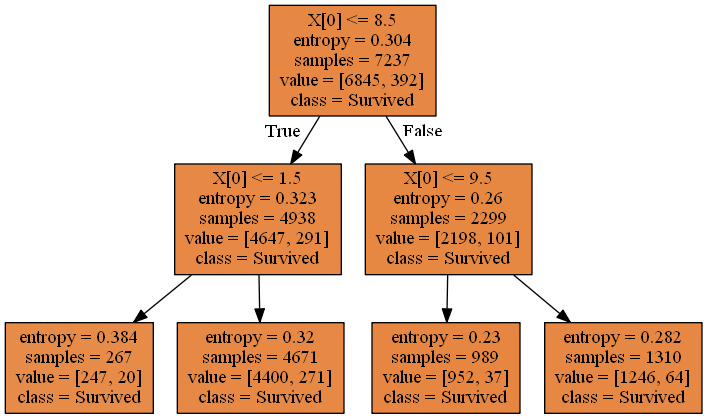

In [9]:
useTree('x3',2)

Variable:  x3


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),267.0,0.036894,247.0,0.036085,20.0,0.051020,0.074906,-0.346356
b(2-8),4671.0,0.645433,4400.0,0.642805,271.0,0.691327,0.058018,-0.072771
c(9),989.0,0.136659,952.0,0.139080,37.0,0.094388,0.037412,0.387635
d(10),1310.0,0.181014,1246.0,0.182031,64.0,0.163265,0.048855,0.108799
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.028069805580175106


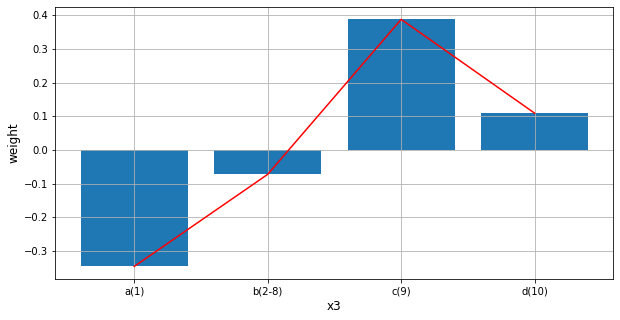

In [10]:
gpBins = [0, 1, 8, 9,100]
gpLabels = ['a(1)','b(2-8)','c(9)','d(10)']
data['x3'] = pd.cut(data_orng['x3'], bins=gpBins, labels=gpLabels)
a = screening('x3')

Variable:  x3


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),267.0,0.036894,247.0,0.036085,20.0,0.051020,0.074906,-0.346356
a(2-8),4671.0,0.645433,4400.0,0.642805,271.0,0.691327,0.058018,-0.072771
c(9-10),2299.0,0.317673,2198.0,0.321110,101.0,0.257653,0.043932,0.220171
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.022675441748883963


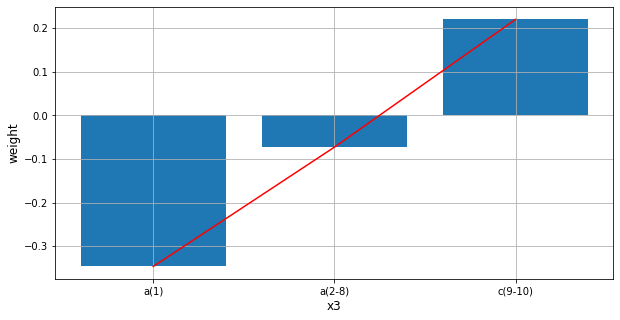

In [11]:
gpBins = [0, 1, 8, 100]
gpLabels = ['a(1)','a(2-8)','c(9-10)']
data['x3'] = pd.cut(data_orng['x3'], bins=gpBins, labels=gpLabels)
a = screening('x3')

Variable:  x3


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-3),1363.0,0.188338,1277.0,0.18656,86.0,0.219388,0.063096,-0.162090
b(4-8),3575.0,0.493989,3370.0,0.49233,205.0,0.522959,0.057343,-0.060354
c(9-10),2299.0,0.317673,2198.0,0.32111,101.0,0.257653,0.043932,0.220171
Total,7237.0,1.000000,6845.0,1.00000,392.0,1.000000,0.054166,0.000000


Information Value =  0.02114114268286593


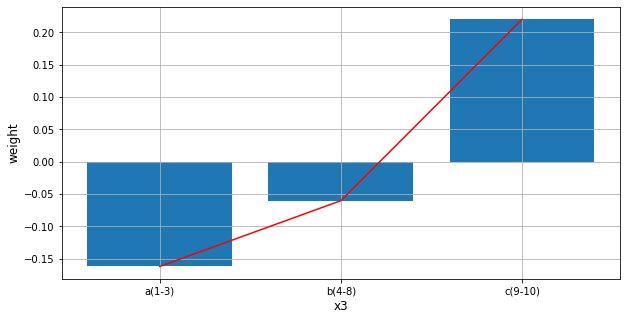

In [12]:
#肉眼分箱试试
gpBins = [0, 3, 8,100]
gpLabels = ['a(1-3)','b(4-8)','c(9-10)']
data['x3'] = pd.cut(data_orng['x3'], bins=gpBins, labels=gpLabels)
a = screening('x3')

IV达标，趋势合理，选入。

In [13]:
gpDict['x3'] = ['bin',gpBins,gpLabels]
run1Df['x3'] = data['x3']

### x4分析

Variable:  x4


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,711.0,0.098245,663.0,0.096859,48.0,0.122449,0.067511,-0.234438
2,897.0,0.123946,849.0,0.124032,48.0,0.122449,0.053512,0.012846
3,849.0,0.117314,804.0,0.117458,45.0,0.114796,0.053004,0.022925
4,678.0,0.093685,646.0,0.094375,32.0,0.081633,0.047198,0.145052
5,649.0,0.089678,615.0,0.089847,34.0,0.086735,0.052388,0.035250
6,3453.0,0.477131,3268.0,0.477429,185.0,0.471939,0.053577,0.011566
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.008102177782287147


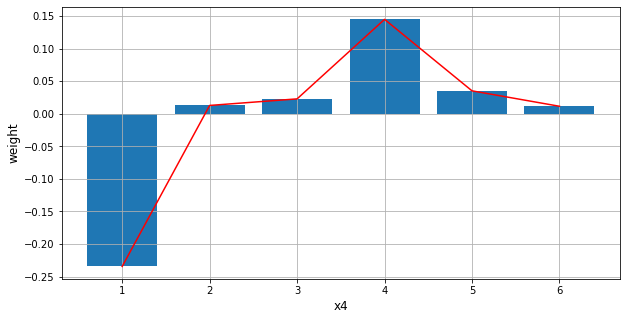

In [14]:
a = screening('x4')

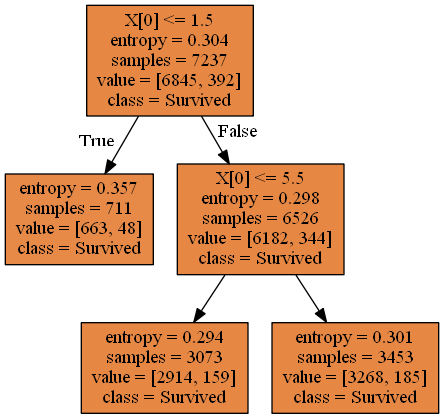

In [15]:
useTree('x4',2)

Variable:  x4


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),711.0,0.098245,663.0,0.096859,48.0,0.122449,0.067511,-0.234438
b(2-5),3073.0,0.424623,2914.0,0.425712,159.0,0.405612,0.051741,0.048366
c(6),3453.0,0.477131,3268.0,0.477429,185.0,0.471939,0.053577,0.011566
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.007034904600777474


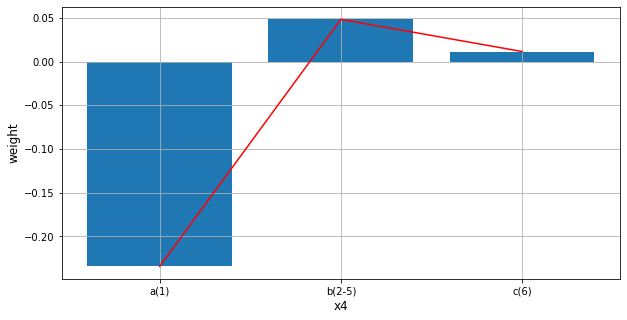

In [16]:
gpBins = [0, 1, 5, 100]
gpLabels = ['a(1)','b(2-5)','c(6)']
data['x4'] = pd.cut(data_orng['x4'], bins=gpBins, labels=gpLabels, include_lowest=True)
a = screening('x4')

Variable:  x4


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),711.0,0.098245,663.0,0.096859,48.0,0.122449,0.067511,-0.234438
b(2-6),6526.0,0.901755,6182.0,0.903141,344.0,0.877551,0.052712,0.028744
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006734803281666214


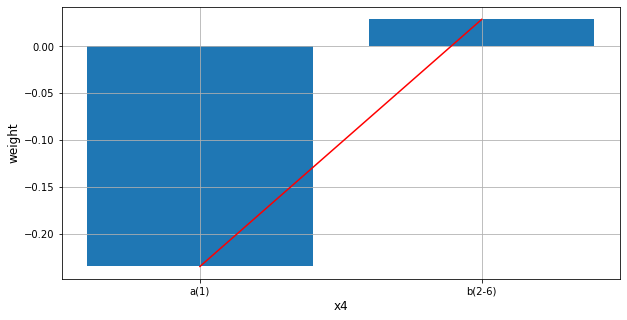

In [17]:
gpBins = [0, 1, 100]
gpLabels = ['a(1)','b(2-6)']
data['x4'] = pd.cut(data_orng['x4'], bins=gpBins, labels=gpLabels)
a = screening('x4')

Variable:  x4


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),711.0,0.098245,663.0,0.096859,48.0,0.122449,0.067511,-0.234438
b(2-3),1746.0,0.241260,1653.0,0.241490,93.0,0.237245,0.053265,0.017736
c(4-6),4780.0,0.660495,4529.0,0.661651,251.0,0.640306,0.052510,0.032792
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006774476513665674


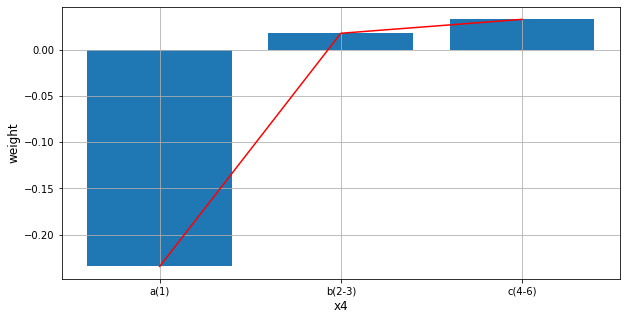

In [18]:
#肉眼分箱试试
gpBins = [0, 1, 3,100]
gpLabels = ['a(1)','b(2-3)','c(4-6)']
data['x4'] = pd.cut(data_orng['x4'], bins=gpBins, labels=gpLabels)
a = screening('x4')

IV不达标，不选。

### x5分析

Variable:  x5


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,234.0,0.032334,215.0,0.031410,19.0,0.048469,0.081197,-0.433813
2,1763.0,0.243609,1685.0,0.246165,78.0,0.198980,0.044243,0.212800
3,1501.0,0.207406,1429.0,0.208766,72.0,0.183673,0.047968,0.128052
4,1051.0,0.145226,992.0,0.144923,59.0,0.150510,0.056137,-0.037826
5,880.0,0.121597,839.0,0.122571,41.0,0.104592,0.046591,0.158627
6,574.0,0.079315,539.0,0.078744,35.0,0.089286,0.060976,-0.125644
7,424.0,0.058588,391.0,0.057122,33.0,0.084184,0.077830,-0.387812
8,302.0,0.041730,283.0,0.041344,19.0,0.048469,0.062914,-0.159004
9,258.0,0.035650,238.0,0.034770,20.0,0.051020,0.077519,-0.383473
10,250.0,0.034545,234.0,0.034186,16.0,0.040816,0.064000,-0.177280


Information Value =  0.04407768433196444


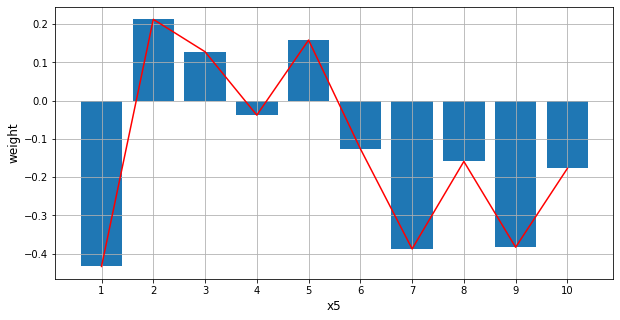

In [19]:
a = screening('x5')

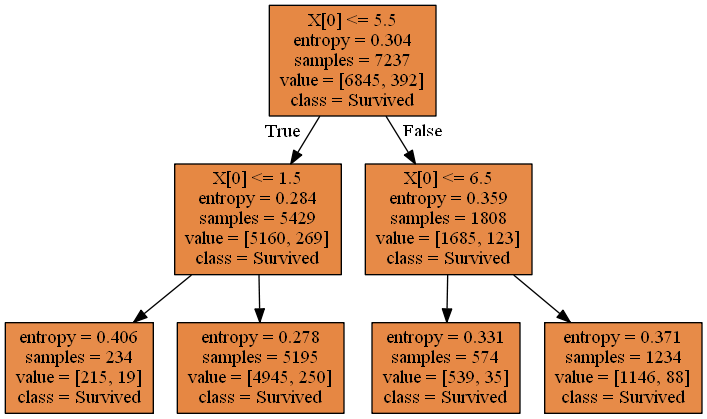

In [20]:
useTree('x5',2)

Variable:  x5


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),234.0,0.032334,215.0,0.031410,19.0,0.048469,0.081197,-0.433813
b(2-5),5195.0,0.717839,4945.0,0.722425,250.0,0.637755,0.048123,0.124659
c(6),574.0,0.079315,539.0,0.078744,35.0,0.089286,0.060976,-0.125644
d(7-10),1234.0,0.170513,1146.0,0.167421,88.0,0.224490,0.071313,-0.293316
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.036019187857415896


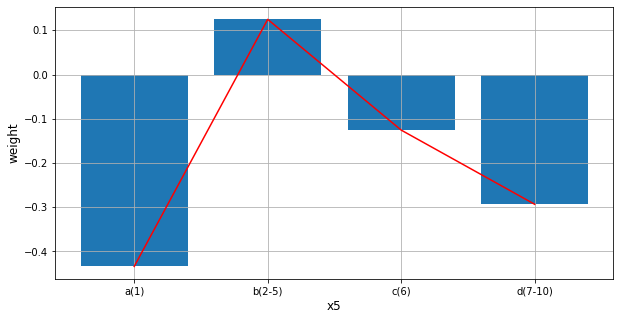

In [21]:
gpBins = [0, 1, 5, 6,100]
gpLabels = ['a(1)','b(2-5)','c(6)','d(7-10)']
data['x5'] = pd.cut(data_orng['x5'], bins=gpBins, labels=gpLabels)
a = screening('x5')

Variable:  x5


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-3),3498.0,0.483349,3329.0,0.486340,169.0,0.431122,0.048313,0.120517
a(4-6),2505.0,0.346138,2370.0,0.346238,135.0,0.344388,0.053892,0.005359
b(7-10),1234.0,0.170513,1146.0,0.167421,88.0,0.224490,0.071313,-0.293316
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.023403636666018135


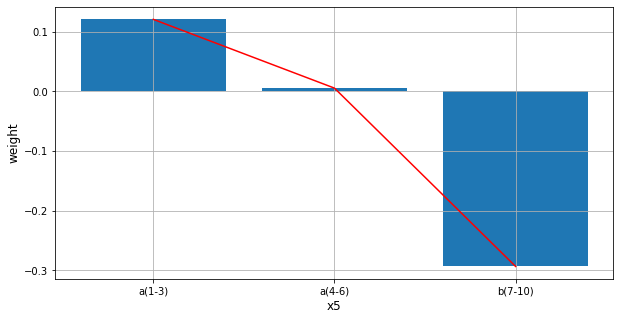

In [119]:
#调整合并,逻辑上1坏率较高不太合理，可能因为样本少的偶然缘故

gpBins = [0, 3,6,100]
gpLabels = ['a(1-3)','a(4-6)','b(7-10)']
data['x5'] = pd.cut(data_orng['x5'], bins=gpBins, labels=gpLabels)
a = screening('x5')

保持合格IV，可以选入。

In [23]:
gpDict['x5'] = ['bin',gpBins,gpLabels]
run1Df['x5'] = data['x5']

### x6分析

Variable:  x6


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,9.0,0.001244,9.0,0.001315,0.0001,0.000100,0.000011,2.576291
2,160.0,0.022109,154.0,0.022498,6.0000,0.015306,0.037500,0.385181
3,302.0,0.041730,281.0,0.041052,21.0000,0.053571,0.069536,-0.266180
4,391.0,0.054028,371.0,0.054200,20.0000,0.051020,0.051151,0.060458
5,449.0,0.062042,423.0,0.061797,26.0000,0.066327,0.057906,-0.070736
6,395.0,0.054581,365.0,0.053324,30.0000,0.076531,0.075949,-0.361312
7,446.0,0.061628,426.0,0.062235,20.0000,0.051020,0.044843,0.198695
8,541.0,0.074755,515.0,0.075237,26.0000,0.066327,0.048059,0.126058
9,1549.0,0.214039,1462.0,0.213587,87.0000,0.221939,0.056165,-0.038359
10,2995.0,0.413846,2839.0,0.414755,156.0000,0.397959,0.052087,0.041339


Information Value =  0.022496409905967994


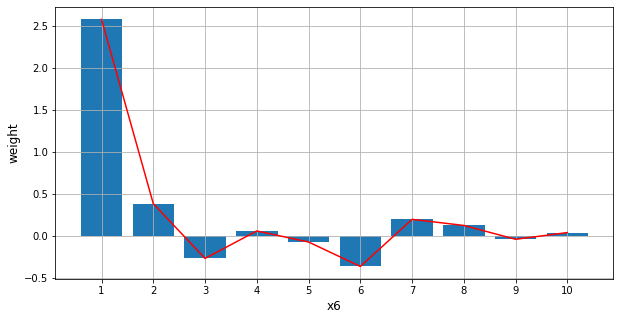

In [24]:
a = screening('x6')

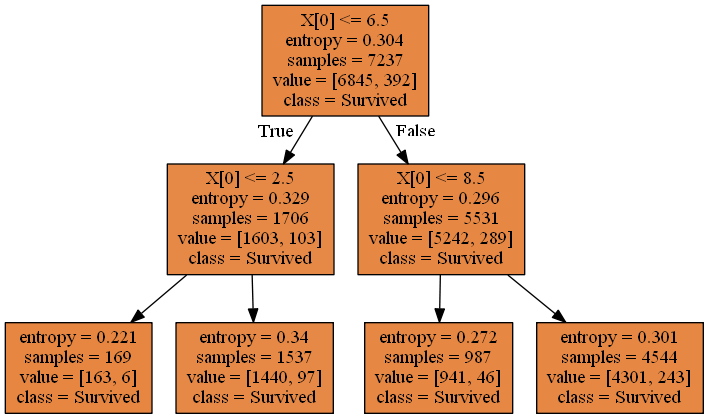

In [25]:
useTree('x6',2)

Variable:  x6


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-2),169.0,0.023352,163.0,0.023813,6.0,0.015306,0.035503,0.441979
b(3-6),1537.0,0.212381,1440.0,0.210373,97.0,0.247449,0.063110,-0.162324
c(7-8),987.0,0.136382,941.0,0.137473,46.0,0.117347,0.046606,0.158290
d(9-10),4544.0,0.627884,4301.0,0.628342,243.0,0.619898,0.053477,0.013529
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.013078206214089465


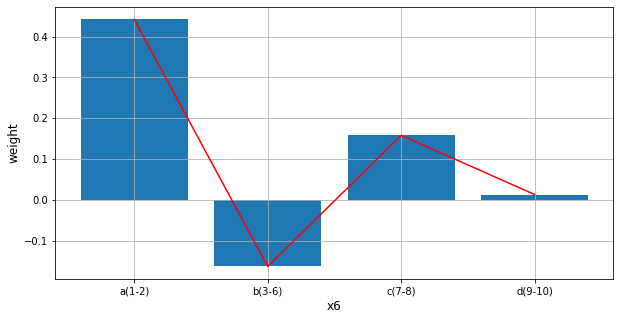

In [26]:
gpBins = [0, 2, 6, 8,100]
gpLabels = ['a(1-2)','b(3-6)','c(7-8)','d(9-10)']
data['x6'] = pd.cut(data_orng['x6'], bins=gpBins, labels=gpLabels)
a = screening('x6')

IV不达标，趋势不合理，不选。

### x7分析

Variable:  x7


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,363.0,0.050159,344.0,0.050256,19.0,0.048469,0.052342,0.036191
2,297.0,0.041039,287.0,0.041928,10.0,0.025510,0.033670,0.496885
3,1788.0,0.247064,1677.0,0.244996,111.0,0.283163,0.062081,-0.144780
4,1210.0,0.167196,1140.0,0.166545,70.0,0.178571,0.057851,-0.069724
5,1306.0,0.180462,1235.0,0.180424,71.0,0.181122,0.054364,-0.003866
6,1481.0,0.204643,1405.0,0.205259,76.0,0.193878,0.051317,0.057047
7,331.0,0.045737,320.0,0.046749,11.0,0.028061,0.033233,0.510414
8,264.0,0.036479,249.0,0.036377,15.0,0.038265,0.056818,-0.050609
9,142.0,0.019621,135.0,0.019722,7.0,0.017857,0.049296,0.099353
10,55.0,0.007600,53.0,0.007743,2.0,0.005102,0.036364,0.417133


Information Value =  0.02616016430783689


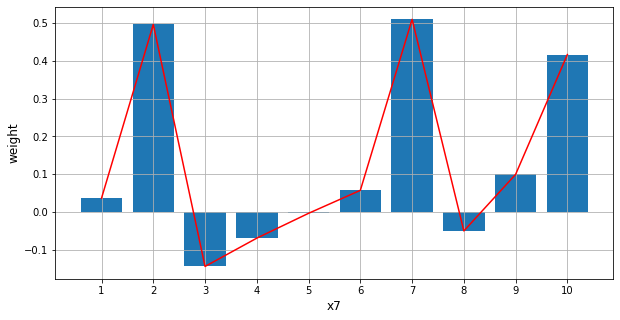

In [27]:
a = screening('x7')

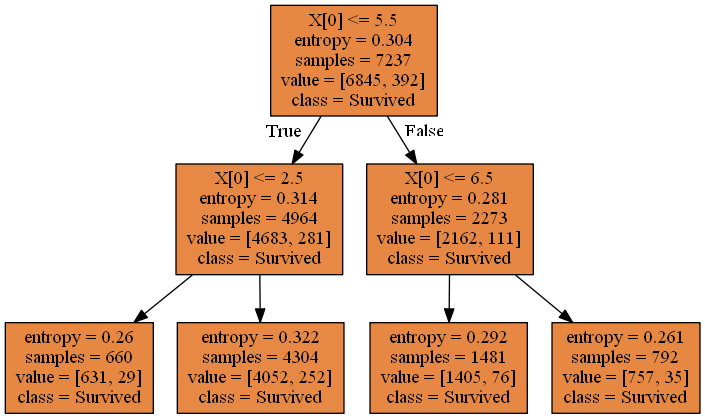

In [28]:
useTree('x7',2)

Variable:  x7


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-2),660.0,0.091198,631.0,0.092184,29.0,0.073980,0.043939,0.219998
b(3-5),4304.0,0.594722,4052.0,0.591965,252.0,0.642857,0.058550,-0.082475
c(6),1481.0,0.204643,1405.0,0.205259,76.0,0.193878,0.051317,0.057047
d(7-10),792.0,0.109438,757.0,0.110592,35.0,0.089286,0.044192,0.214003
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.01341113786558898


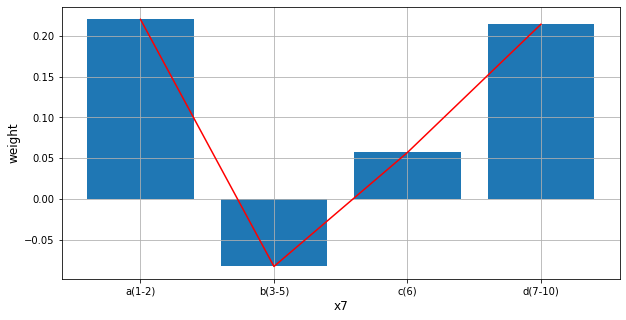

In [29]:
gpBins = [0, 2, 5, 6,100]
gpLabels = ['a(1-2)','b(3-5)','c(6)','d(7-10)']
data['x7'] = pd.cut(data_orng['x7'], bins=gpBins, labels=gpLabels)
a = screening('x7')

IV不达标，趋势不合理，不选。

### x8分析

Variable:  x8


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,55.0,0.007600,52.0,0.007597,3.0,0.007653,0.054545,-0.007380
2,111.0,0.015338,107.0,0.015632,4.0,0.010204,0.036036,0.426523
3,160.0,0.022109,156.0,0.022790,4.0,0.010204,0.025000,0.803550
4,202.0,0.027912,197.0,0.028780,5.0,0.012755,0.024752,0.813754
5,205.0,0.028327,192.0,0.028050,13.0,0.033163,0.063415,-0.167466
6,1253.0,0.173138,1204.0,0.175895,49.0,0.125000,0.039106,0.341572
7,1014.0,0.140113,957.0,0.139810,57.0,0.145408,0.056213,-0.039260
8,1806.0,0.249551,1712.0,0.250110,94.0,0.239796,0.052049,0.042111
9,1078.0,0.148957,1000.0,0.146092,78.0,0.198980,0.072356,-0.308965
10,1353.0,0.186956,1268.0,0.185245,85.0,0.216837,0.062823,-0.157467


Information Value =  0.06567945350312183


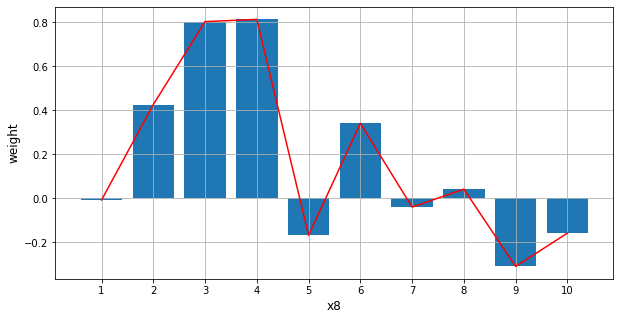

In [30]:
a = screening('x8')

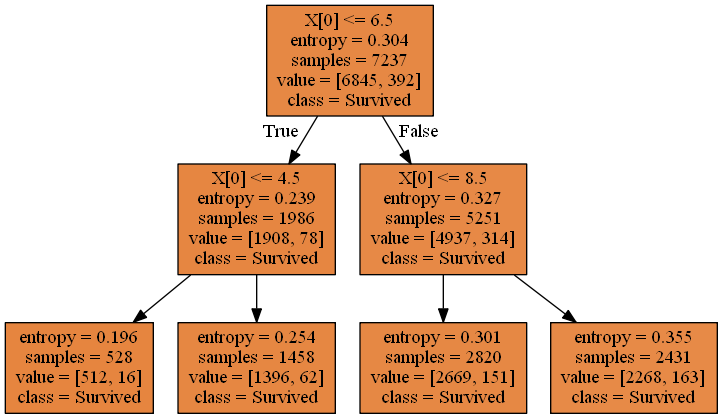

In [31]:
useTree('x8',2)

Variable:  x8


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-4),528.0,0.072958,512.0,0.074799,16.0,0.040816,0.030303,0.605724
b(5-6),1458.0,0.201465,1396.0,0.203944,62.0,0.158163,0.042524,0.254220
c(7-8),2820.0,0.389664,2669.0,0.389920,151.0,0.385204,0.053546,0.012167
d(9-10),2431.0,0.335913,2268.0,0.331337,163.0,0.415816,0.067051,-0.227108
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.05146609991127697


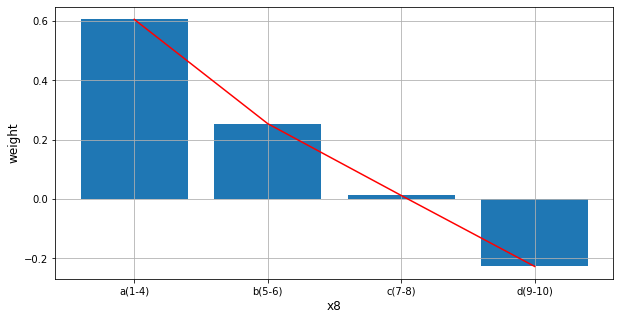

In [32]:
gpBins = [0, 4, 6, 8,100]
gpLabels = ['a(1-4)','b(5-6)','c(7-8)','d(9-10)']
data['x8'] = pd.cut(data_orng['x8'], bins=gpBins, labels=gpLabels)
a = screening('x8')

IV达标，趋势合理，选入。

In [33]:
gpDict['x8'] = ['bin',gpBins,gpLabels]
run1Df['x8'] = data['x8']

### x9分析

Variable:  x9


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
A,1087.0,0.150200,1026.0,0.149890,61.0,0.155612,0.056118,-0.037463
B,2635.0,0.364101,2499.0,0.365084,136.0,0.346939,0.051613,0.050979
C,2413.0,0.333425,2290.0,0.334551,123.0,0.313776,0.050974,0.064111
D,1102.0,0.152273,1030.0,0.150475,72.0,0.183673,0.065336,-0.199364
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.009089919820730858


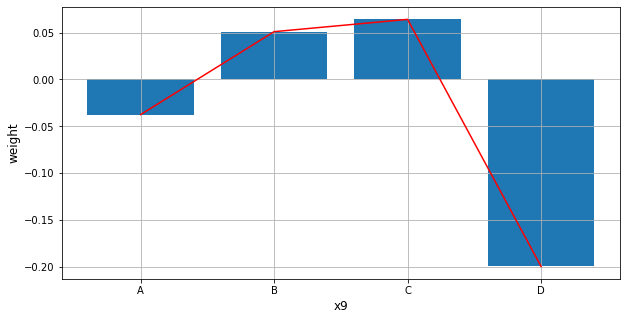

In [34]:
a = screening('x9')

Variable:  x9


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,2189.0,0.302473,2056.0,0.300365,133.0,0.339286,0.060758,-0.121843
b,2635.0,0.364101,2499.0,0.365084,136.0,0.346939,0.051613,0.050979
c,2413.0,0.333425,2290.0,0.334551,123.0,0.313776,0.050974,0.064111
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006999151556362326


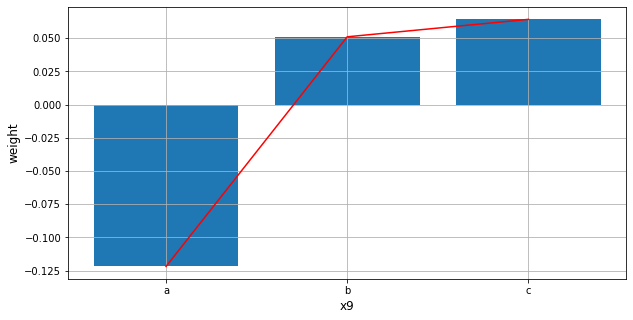

In [35]:
data['x9'] = data_orng['x9'].apply(lambda x: 'a' if x == 'A' or x == 'D' else ('b' if x == 'B' else 'c') )
a = screening('x9')

Variable:  x9


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,2189.0,0.302473,2056.0,0.300365,133.0,0.339286,0.060758,-0.121843
b,5048.0,0.697527,4789.0,0.699635,259.0,0.660714,0.051307,0.057237
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006969893553122916


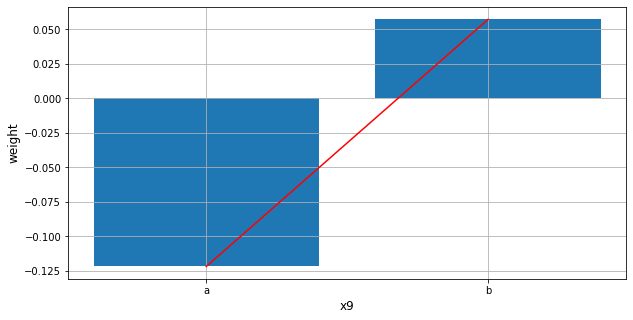

In [36]:
data['x9'] = data_orng['x9'].apply(lambda x: 'a' if x == 'A' or x == 'D' else 'b')
a = screening('x9')

IV不达标，不选。

### x10分析

Variable:  x10


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
A,251.0,0.034683,246.0,0.035939,5.0,0.012755,0.019920,1.035882
B,820.0,0.113307,797.0,0.116435,23.0,0.058673,0.028049,0.685349
C,1055.0,0.145779,1003.0,0.146530,52.0,0.132653,0.049289,0.099495
D,5111.0,0.706232,4799.0,0.701096,312.0,0.795918,0.061045,-0.126852
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.0770116186222059


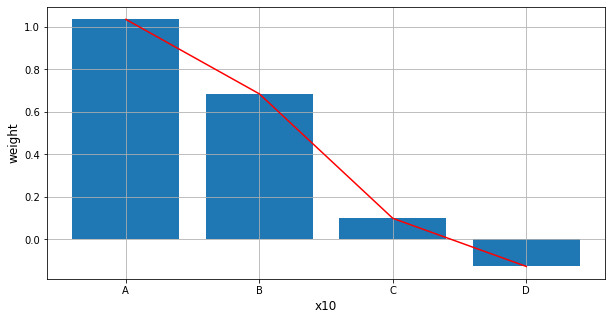

In [37]:
a = screening('x10')

IV达标，趋势合理，选入。

In [38]:
run1Df['x10'] = data['x10']

### x11分析

Variable:  x11


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
A,75.0,0.010363,72.0,0.010519,3.0,0.007653,0.040000,0.318042
B,681.0,0.094100,644.0,0.094083,37.0,0.094388,0.054332,-0.003231
C,6155.0,0.850491,5827.0,0.851278,328.0,0.836735,0.053290,0.017232
D,326.0,0.045046,302.0,0.044120,24.0,0.061224,0.073620,-0.327639
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006767130197734542


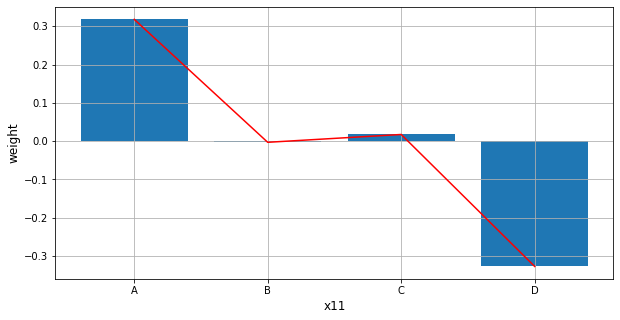

In [39]:
a = screening('x11')

Variable:  x11


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,75.0,0.010363,72.0,0.010519,3.0,0.007653,0.040000,0.318042
b,6836.0,0.944590,6471.0,0.945362,365.0,0.931122,0.053394,0.015177
c,326.0,0.045046,302.0,0.044120,24.0,0.061224,0.073620,-0.327639
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006731632743311955


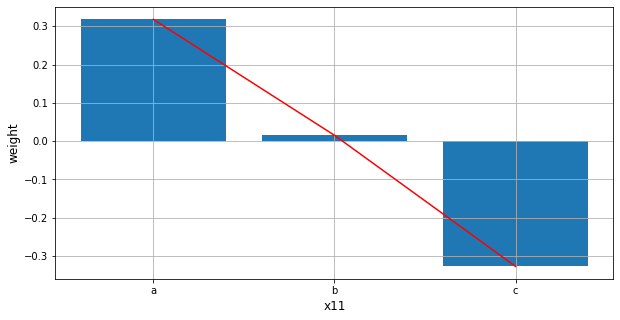

In [40]:
data['x11'] = data_orng['x11'].apply(lambda x: 'a' if x == 'A' else ('c' if x == 'D' else 'b'))
a = screening('x11')

Variable:  x11


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,6911.0,0.954954,6543.0,0.95588,368.0,0.938776,0.053248,0.018056
b,326.0,0.045046,302.0,0.04412,24.0,0.061224,0.073620,-0.327639
Total,7237.0,1.000000,6845.0,1.00000,392.0,1.000000,0.054166,0.000000


Information Value =  0.0059130061016951785


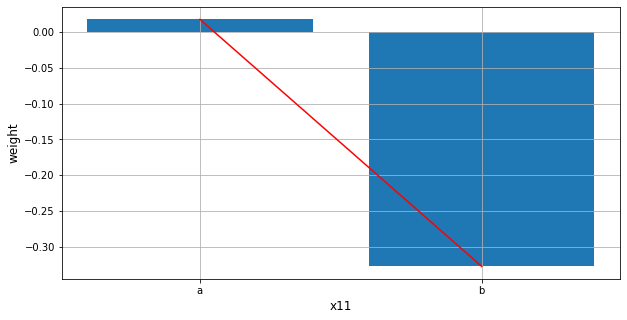

In [41]:
data['x11'] = data_orng['x11'].apply(lambda x: 'b' if x == 'D' else 'a')
a = screening('x11')

IV不达标，不选。

### x12分析

Variable:  x12


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,1036.0,0.143153,1024.0,0.149598,12.0000,0.030612,0.011583,1.586553
2,1692.0,0.233799,1639.0,0.239445,53.0000,0.135204,0.031324,0.571538
3,1961.0,0.270969,1831.0,0.267495,130.0000,0.331633,0.066293,-0.214929
4,1292.0,0.178527,1197.0,0.174872,95.0000,0.242347,0.073529,-0.326315
5,1047.0,0.144673,961.0,0.140394,86.0000,0.219388,0.082139,-0.446385
6,204.0,0.028188,188.0,0.027465,16.0000,0.040816,0.078431,-0.396159
7,5.0,0.000691,5.0,0.000730,0.0001,0.000100,0.000020,1.988505
Total,7237.0,1.000000,6845.0,1.000000,392.0001,1.000100,0.054166,0.000000


Information Value =  0.32596253881329057


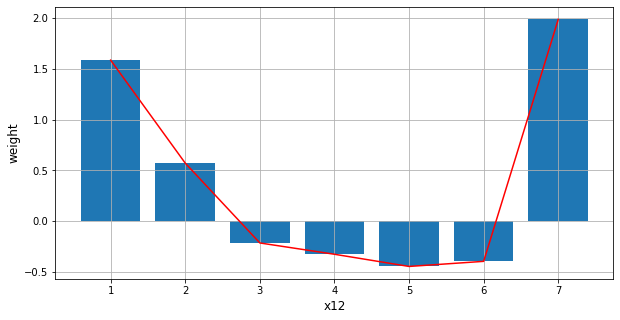

In [42]:
a = screening('x12')

Variable:  x12


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,1036.0,0.143153,1024.0,0.149598,12.0,0.030612,0.011583,1.586553
b,1692.0,0.233799,1639.0,0.239445,53.0,0.135204,0.031324,0.571538
c,1961.0,0.270969,1831.0,0.267495,130.0,0.331633,0.066293,-0.214929
d,1292.0,0.178527,1197.0,0.174872,95.0,0.242347,0.073529,-0.326315
e,1256.0,0.173553,1154.0,0.168590,102.0,0.260204,0.081210,-0.433995
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.3239183177822468


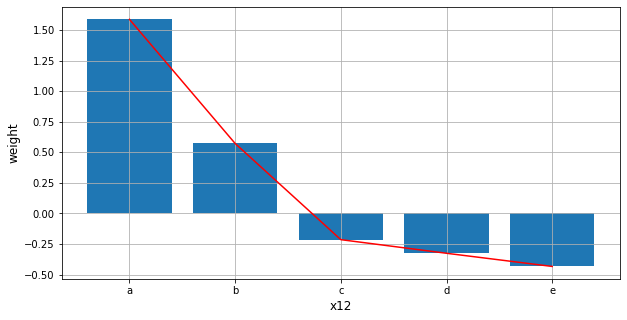

In [43]:
#7显然是因为样本过少
x12_map = {1:'a', 2:'b', 3:'c', 4:'d', 5:'e', 6:'e', 7:'e'}
data['x12'] = data_orng['x12'].copy().map(x12_map)
a = screening('x12')

IV达标，趋势合理，选入。

In [44]:
gpDict['x12'] = ['map', x12_map]
run1Df['x12'] = data['x12']

### x13分析

In [45]:
a = screening('x13')

There is missing!


In [46]:
data['x13'] = data_orng['x13'].fillna(20060000)

Variable:  x13


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
20060000.0,6505.0,0.898853,6140.0000,0.897005,365.0000,0.931122,0.056111,-0.037329
20060523.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,0.379067
20061028.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,0.379067
20061030.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,0.379067
20070115.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,0.379067
...,...,...,...,...,...,...,...,...
20190719.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,0.379067
20190806.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,0.379067
20190809.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,0.379067
20190814.0,1.0,0.000138,1.0000,0.000146,0.0001,0.000100,0.000100,0.379067


Information Value =  0.23755354676790924


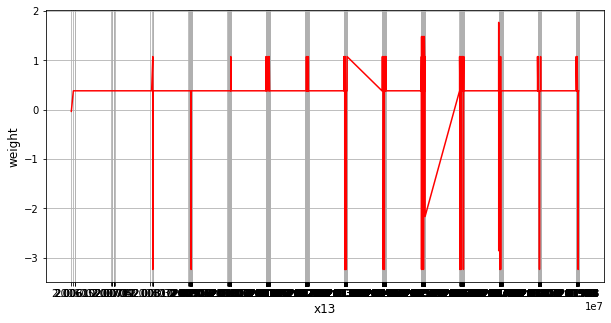

In [47]:
a = screening('x13')

这个日期真不知道咋分析

### x14分析

Variable:  x14


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,2011.0,0.277878,1873.0,0.273630,138.0000,0.352041,0.068623,-0.251969
"1,2",102.0,0.014094,95.0,0.013879,7.0000,0.017857,0.068627,-0.252045
"1,2,3",5.0,0.000691,5.0,0.000730,0.0001,0.000100,0.000020,1.988505
"1,2,3,5",14.0,0.001935,14.0,0.002045,0.0001,0.000100,0.000007,3.018124
"1,2,3,6",1.0,0.000138,1.0,0.000146,0.0001,0.000100,0.000100,0.379067
"1,2,5",91.0,0.012574,87.0,0.012710,4.0000,0.010204,0.043956,0.219602
"1,2,5,6",17.0,0.002349,17.0,0.002484,0.0001,0.000100,0.000006,3.212280
"1,2,6",21.0,0.002902,21.0,0.003068,0.0001,0.000100,0.000005,3.423589
"1,3",159.0,0.021970,152.0,0.022206,7.0000,0.017857,0.044025,0.217958
"1,3,5",79.0,0.010916,73.0,0.010665,6.0000,0.015306,0.075949,-0.361312


Information Value =  0.20112434730875609


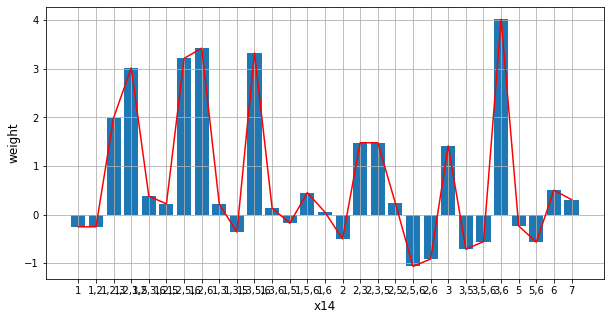

In [48]:
a = screening('x14')

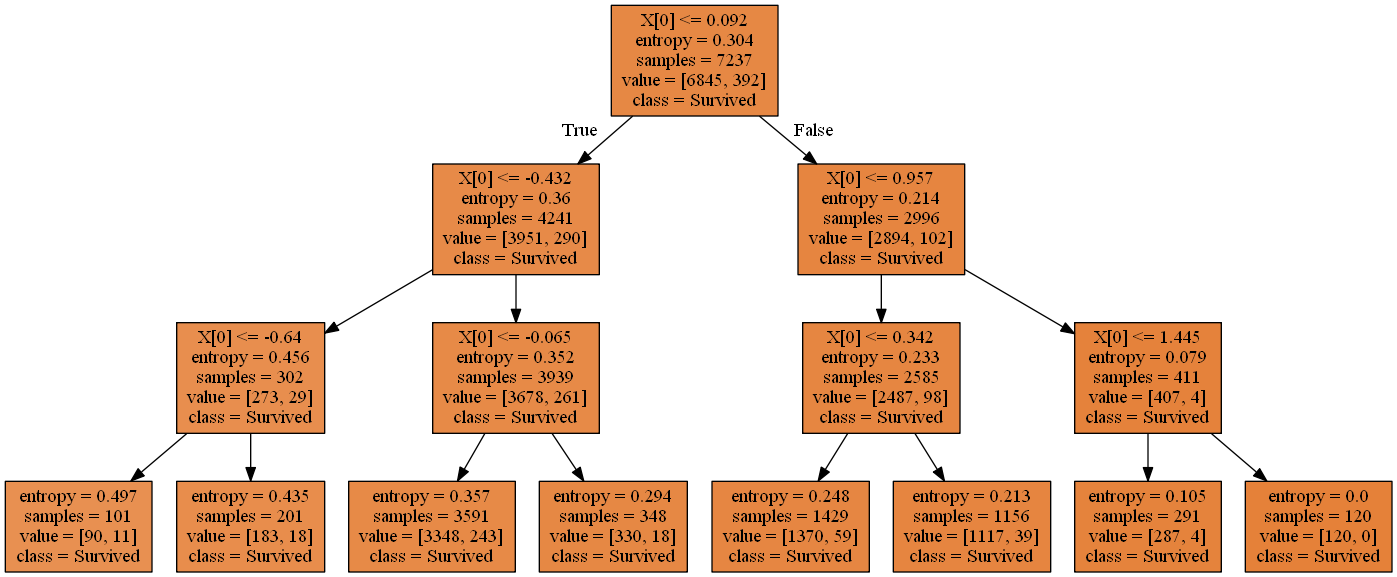

In [49]:
deepAnlys = a[0].iloc[:-1,:].sort_values('WOE')
x14_map_1 = dict(zip(list(deepAnlys.index),list(deepAnlys['WOE'].values))) #每组赋予WOE的值
data_x14 = data_orng['x14'].copy().map(x14_map_1)
data['x14'] = data_x14
useTree('x14', 3, False)

Variable:  x14


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
b,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
c,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
d,7237.0,1.0,6845.0,1.0,392.0,1.0,0.054166,0.0
e,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
f,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
g,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
h,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Total,7237.0,1.0,6845.0,1.0,392.0,1.0,0.054166,0.0


Information Value =  0.0


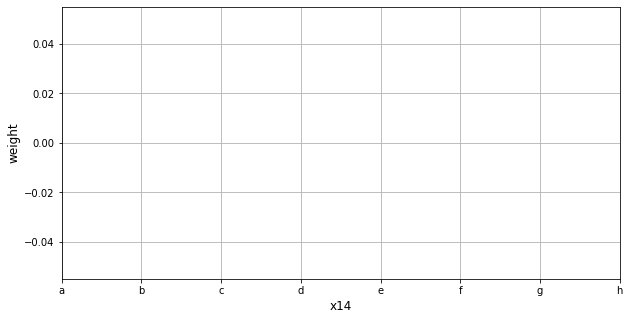

In [50]:
gpBins = [-10000, -64.045, -43.158, -6.529, 9.221,34.25, 95.667, 144.543, 10000]
gpLabels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
data['x14'] = pd.cut(data_x14, bins=gpBins, labels=gpLabels)
a = screening('x14')

Variable:  x14


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
b,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
c,7237.0,1.0,6845.0,1.0,392.0,1.0,0.054166,0.0
d,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
e,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Total,7237.0,1.0,6845.0,1.0,392.0,1.0,0.054166,0.0


Information Value =  0.0


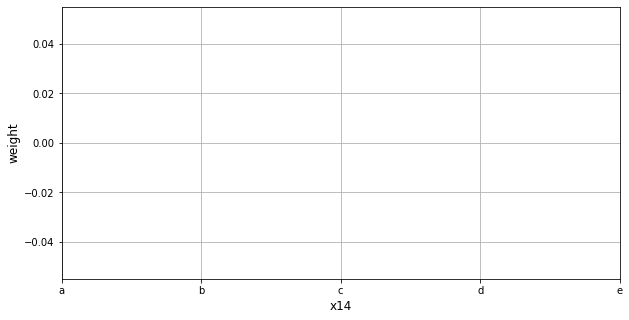

In [51]:
gpBins = [-10000, -43.158, -6.529, 9.221,95.667, 10000]
gpLabels = ['a', 'b', 'c', 'd', 'e']
data['x14'] = pd.cut(data_x14, bins=gpBins, labels=gpLabels)
a = screening('x14')

In [52]:
x14_mapDf = pd.concat([data_orng['x14'],data['x14']],axis = 1).drop_duplicates()
x14_map_2 = dict(zip(list(x14_mapDf.iloc[:,0].values),list(x14_mapDf.iloc[:,1].values)))

Variable:  x14


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
c,7237.0,1.0,6845.0,1.0,392.0,1.0,0.054166,0.0
Total,7237.0,1.0,6845.0,1.0,392.0,1.0,0.054166,0.0


Information Value =  0.0


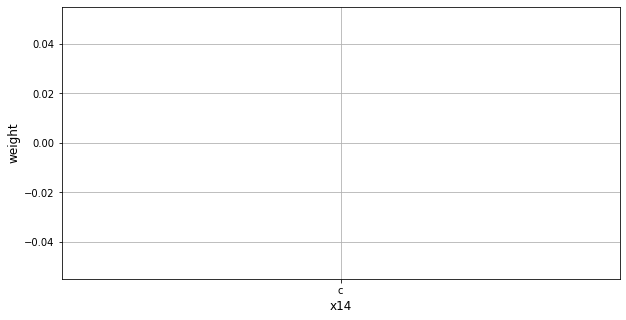

In [53]:
#检验一下没有搞错
data['x14'] = data_orng['x14'].copy().map(x14_map_2)
a = screening('x14')

IV达标，趋势合理，但是不方便解释，暂时不选入。

In [54]:
#gpDict['x14'] = ['map',x14_map_2]
#run1Df['x14'] = data['x14']

### x15分析

Variable:  x15


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,112.0,0.015476,107.0,0.015632,5.0,0.012755,0.044643,0.203379
2,269.0,0.037170,249.0,0.036377,20.0,0.051020,0.074349,-0.338291
3,123.0,0.016996,114.0,0.016654,9.0,0.022959,0.073171,-0.321038
4,99.0,0.013680,91.0,0.013294,8.0,0.020408,0.080808,-0.428594
5,141.0,0.019483,132.0,0.019284,9.0,0.022959,0.063830,-0.174435
6,180.0,0.024872,169.0,0.024690,11.0,0.028061,0.061111,-0.128008
7,196.0,0.027083,180.0,0.026297,16.0,0.040816,0.081633,-0.439644
8,248.0,0.034268,229.0,0.033455,19.0,0.048469,0.076613,-0.370729
9,294.0,0.040625,283.0,0.041344,11.0,0.028061,0.037415,0.387540
10,5575.0,0.770347,5291.0,0.772973,284.0,0.724490,0.050942,0.064776


Information Value =  0.031922410028841865


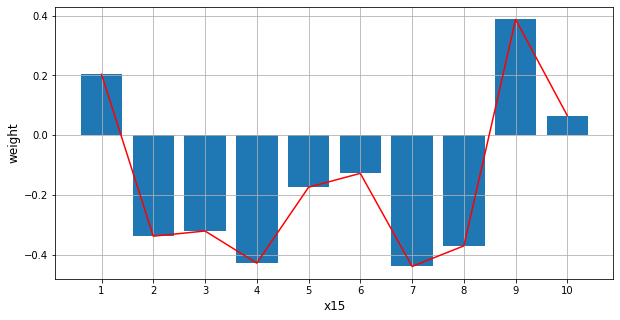

In [55]:
a = screening('x15')

Variable:  x15


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-8),1368.0,0.189029,1271.0,0.185683,97.0,0.247449,0.070906,-0.287164
b(9-10),5869.0,0.810971,5574.0,0.814317,295.0,0.752551,0.050264,0.078881
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.02260910798117169


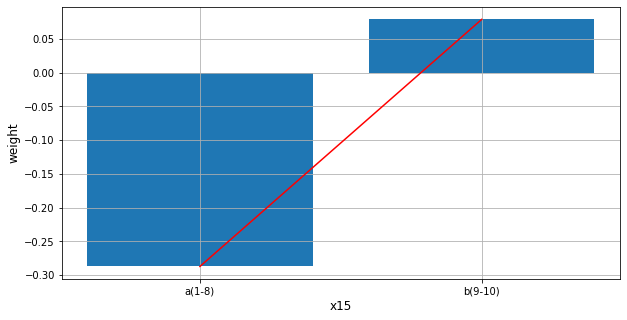

In [56]:
gpBins = [0,  8, 100]
gpLabels = ['a(1-8)', 'b(9-10)']
data['x15'] = pd.cut(data_orng['x15'], bins=gpBins, labels=gpLabels)
a = screening('x15')

IV达标，趋势合理，选入。

In [57]:
gpDict['x15'] = ['bin',gpBins, gpLabels]
run1Df['x15'] = data['x15']

### x16分析

Variable:  x16


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,861.0,0.118972,805.0,0.117604,56.0,0.142857,0.065041,-0.194521
2,1504.0,0.207821,1431.0,0.209058,73.0,0.186224,0.048537,0.115657
3,1580.0,0.218323,1500.0,0.219138,80.0,0.204082,0.050633,0.071182
4,3292.0,0.454885,3109.0,0.454200,183.0,0.466837,0.055589,-0.027442
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.008971601157083856


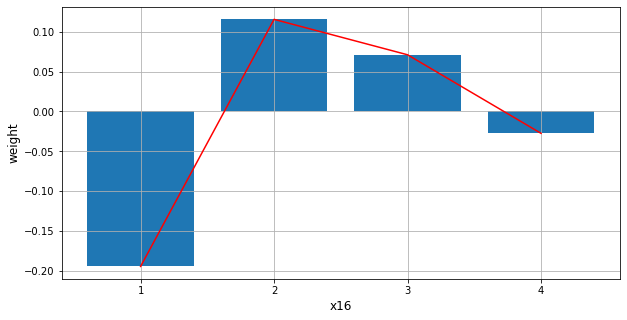

In [58]:
a = screening('x16')

IV不达标，趋势不合理，不选。

### x17分析

Variable:  x17


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,172.0,0.023767,167.0,0.024397,5.0,0.012755,0.029070,0.648544
2,82.0,0.011331,75.0,0.010957,7.0,0.017857,0.085366,-0.488434
3,117.0,0.016167,111.0,0.016216,6.0,0.015306,0.051282,0.057759
4,246.0,0.033992,236.0,0.034478,10.0,0.025510,0.040650,0.301235
5,755.0,0.104325,704.0,0.102849,51.0,0.130102,0.067550,-0.235059
6,1239.0,0.171204,1171.0,0.171074,68.0,0.173469,0.054883,-0.013906
7,893.0,0.123394,830.0,0.121256,63.0,0.160714,0.070549,-0.281721
8,1124.0,0.155313,1056.0,0.154273,68.0,0.173469,0.060498,-0.117276
9,1324.0,0.182949,1242.0,0.181446,82.0,0.209184,0.061934,-0.142253
10,1285.0,0.177560,1253.0,0.183053,32.0,0.081633,0.024903,0.807548


Information Value =  0.11932933347635674


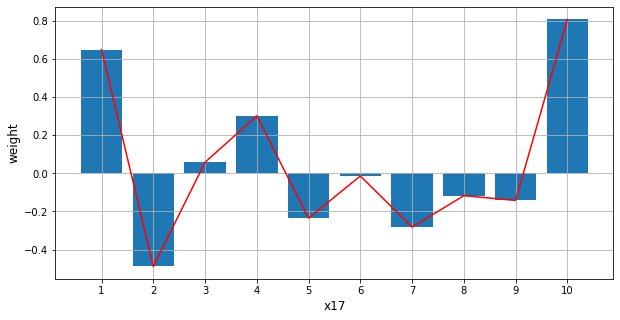

In [59]:
a = screening('x17')

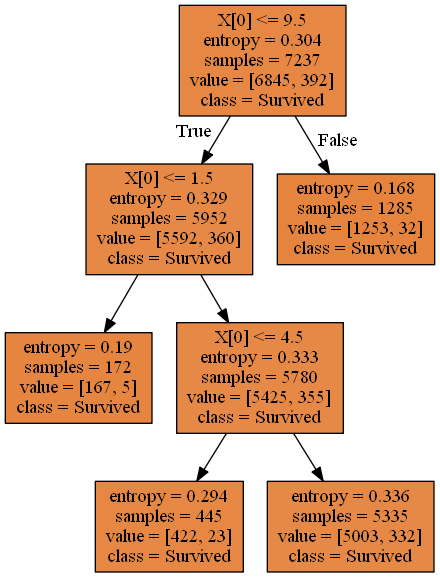

In [60]:
useTree('x17',3)

Variable:  x17


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),172.0,0.023767,167.0,0.024397,5.0,0.012755,0.029070,0.648544
b(2-4),445.0,0.061490,422.0,0.061651,23.0,0.058673,0.051685,0.049499
c(5-9),5335.0,0.737184,5003.0,0.730898,332.0,0.846939,0.062231,-0.147354
d(10),1285.0,0.177560,1253.0,0.183053,32.0,0.081633,0.024903,0.807548
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.10669896300454829


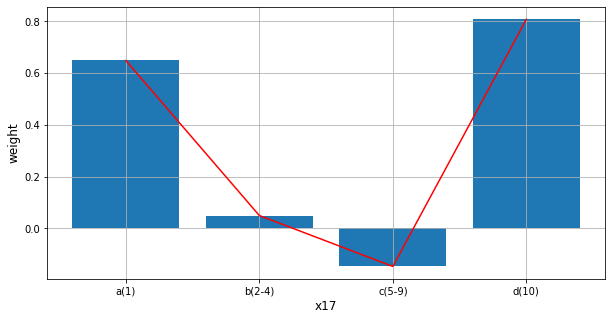

In [61]:
gpBins = [0, 1, 4, 9, 100]
gpLabels = ['a(1)', 'b(2-4)','c(5-9)','d(10)']
data['x17'] = pd.cut(data_orng['x17'], bins=gpBins, labels=gpLabels)
a = screening('x17')

Variable:  x17


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(10),1285.0,0.177560,1253.0,0.183053,32.0,0.081633,0.024903,0.807548
b(1-4),617.0,0.085256,589.0,0.086048,28.0,0.071429,0.045381,0.186210
c(5-6),1994.0,0.275529,1875.0,0.273923,119.0,0.303571,0.059679,-0.102771
d(7-9),3341.0,0.461655,3128.0,0.456976,213.0,0.543367,0.063753,-0.173155
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.10263055971592774


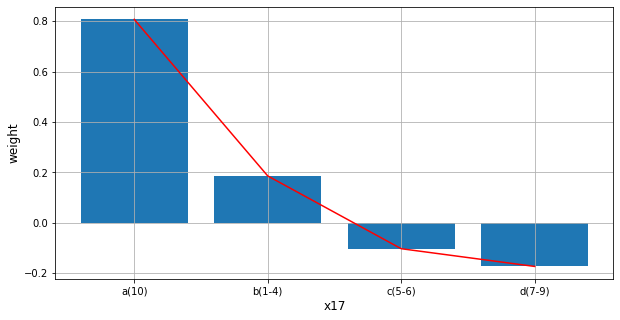

In [62]:
#还款金额最高的人群必然收入不低，很可能属于高净值客户，信用观念极好

gpBins = [0,4,6, 9, 100]
gpLabels = ['b(1-4)','c(5-6)','d(7-9)','a(10)']
data['x17'] = pd.cut(data_orng['x17'], bins=gpBins, labels=gpLabels)
a = screening('x17')

选入。

In [63]:
gpDict['x17'] = ['bin',gpBins,gpLabels]
run1Df['x17'] = data['x17']

### x18分析

Variable:  x18


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,7147.0,0.987564,6767.0,0.988605,380.0000,0.969388,0.053169,0.019630
2,12.0,0.001658,12.0,0.001753,0.0001,0.000100,0.000008,2.863973
3,46.0,0.006356,40.0,0.005844,6.0000,0.015306,0.130435,-0.962892
4,19.0,0.002625,18.0,0.002630,1.0000,0.002551,0.052632,0.030360
5,13.0,0.001796,8.0,0.001169,5.0000,0.012755,0.384615,-2.390008
Total,7237.0,1.000000,6845.0,1.000000,392.0001,1.000100,0.054166,0.000000


Information Value =  0.04191688287480145


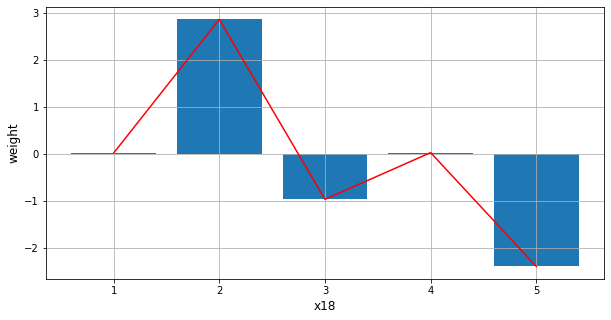

In [64]:
a = screening('x18')

Variable:  x18


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1-2),7159.0,0.989222,6779.0,0.990358,380.0,0.969388,0.053080,0.021402
b(3-5),78.0,0.010778,66.0,0.009642,12.0,0.030612,0.153846,-1.155264
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.02467487670918018


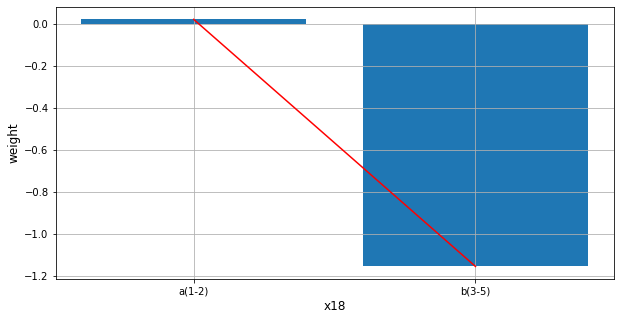

In [65]:
gpBins = [0, 2, 100]
gpLabels = ['a(1-2)', 'b(3-5)']
data['x18'] = pd.cut(data_orng['x18'], bins=gpBins, labels=gpLabels)
a = screening('x18')

IV达标，趋势合理，选入。

In [66]:
gpDict['x18'] = ['bin',gpBins,gpLabels]
run1Df['x18'] = data['x18']

### x19分析

Variable:  x19


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,5090.0,0.703330,4875.0,0.712199,215.0,0.548469,0.042240,0.261225
2,443.0,0.061213,409.0,0.059752,34.0,0.086735,0.076749,-0.372657
3,473.0,0.065359,433.0,0.063258,40.0,0.102041,0.084567,-0.478154
4,238.0,0.032887,225.0,0.032871,13.0,0.033163,0.054622,-0.008861
5,993.0,0.137212,903.0,0.131921,90.0,0.229592,0.090634,-0.554099
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.12549175071494637


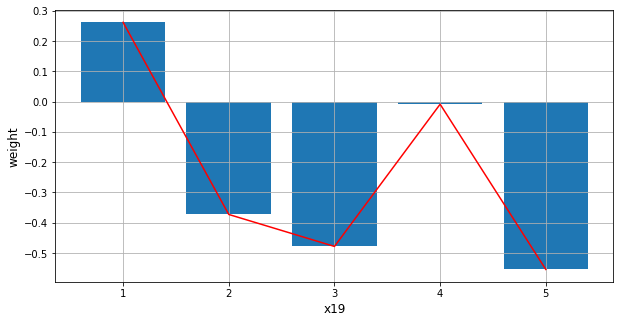

In [67]:
a = screening('x19')

Variable:  x19


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),5090.0,0.703330,4875.0,0.712199,215.0,0.548469,0.042240,0.261225
b(2),443.0,0.061213,409.0,0.059752,34.0,0.086735,0.076749,-0.372657
c(3),473.0,0.065359,433.0,0.063258,40.0,0.102041,0.084567,-0.478154
d(4-5),1231.0,0.170098,1128.0,0.164792,103.0,0.262755,0.083672,-0.466539
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.11707364177944718


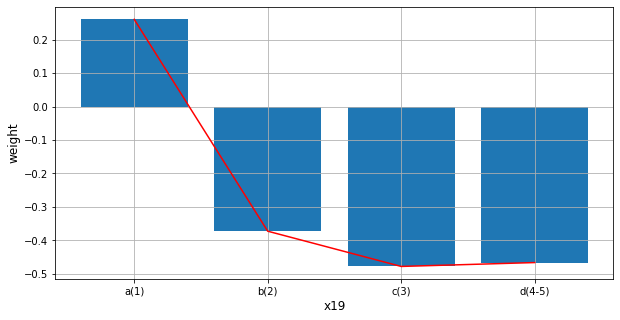

In [68]:
gpBins = [0,1,2,3,100]
gpLabels = ['a(1)','b(2)','c(3)','d(4-5)']
data['x19'] = pd.cut(data_orng['x19'], bins=gpBins, labels=gpLabels)
a = screening('x19')

Variable:  x19


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),5090.0,0.703330,4875.0,0.712199,215.0,0.548469,0.042240,0.261225
b(2),443.0,0.061213,409.0,0.059752,34.0,0.086735,0.076749,-0.372657
c(3-5),1704.0,0.235457,1561.0,0.228050,143.0,0.364796,0.083920,-0.469775
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.1170656049559769


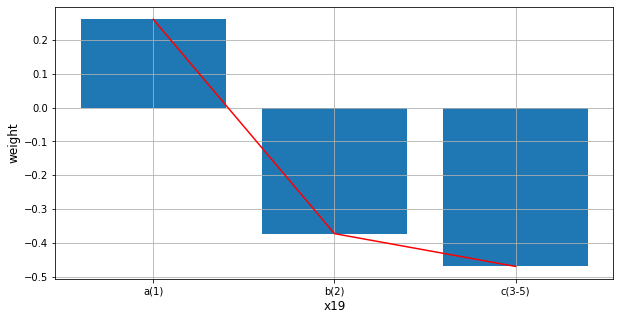

In [69]:
gpBins = [0,1,2,100]
gpLabels = ['a(1)','b(2)','c(3-5)']
data['x19'] = pd.cut(data_orng['x19'], bins=gpBins, labels=gpLabels)
a = screening('x19')

IV达标，趋势合理，选入。

In [70]:
gpDict['x19'] = ['bin',gpBins,gpLabels]
run1Df['x19'] = data['x19']

### x20分析

Variable:  x20


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
1,6902.0,0.953710,6555.0,0.957633,347.0,0.885204,0.050275,0.078647
2,232.0,0.032057,203.0,0.029657,29.0,0.073980,0.125000,-0.914102
3,55.0,0.007600,46.0,0.006720,9.0,0.022959,0.163636,-1.228595
4,35.0,0.004836,30.0,0.004383,5.0,0.012755,0.142857,-1.068252
5,13.0,0.001796,11.0,0.001607,2.0,0.005102,0.153846,-1.155264
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.07914451614917836


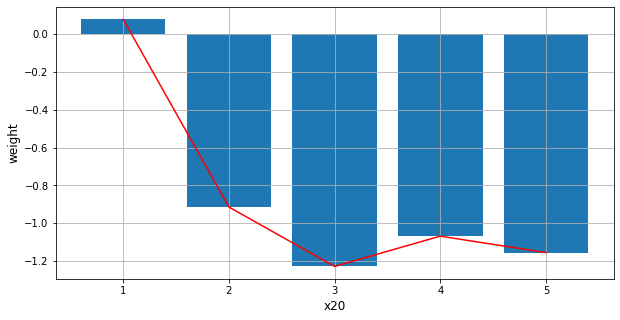

In [71]:
a = screening('x20')

Variable:  x20


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),6902.0,0.953710,6555.0,0.957633,347.0,0.885204,0.050275,0.078647
b(2),232.0,0.032057,203.0,0.029657,29.0,0.073980,0.125000,-0.914102
c(3),55.0,0.007600,46.0,0.006720,9.0,0.022959,0.163636,-1.228595
d(4-5),48.0,0.006633,41.0,0.005990,7.0,0.017857,0.145833,-1.092350
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.07912638345941644


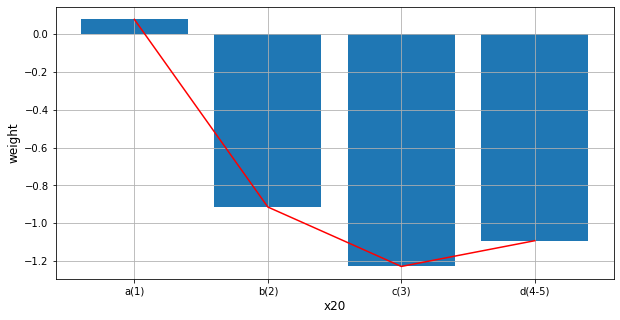

In [72]:
gpBins = [0,1,2,3,100]
gpLabels = ['a(1)','b(2)','c(3)','d(4-5)']
data['x20'] = pd.cut(data_orng['x20'], bins=gpBins, labels=gpLabels)
a = screening('x20')

Variable:  x20


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(1),6902.0,0.953710,6555.0,0.957633,347.0,0.885204,0.050275,0.078647
b(2),232.0,0.032057,203.0,0.029657,29.0,0.073980,0.125000,-0.914102
c(3-5),103.0,0.014232,87.0,0.012710,16.0,0.040816,0.155340,-1.166693
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.07900340076112126


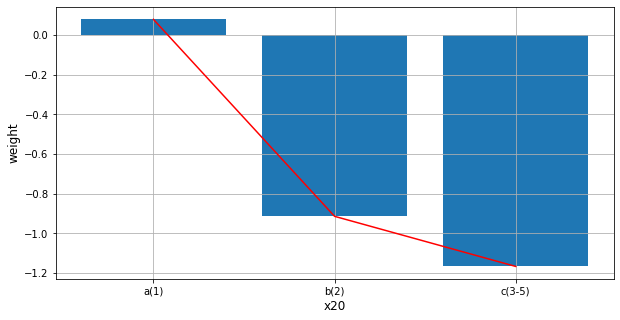

In [73]:
gpBins = [0,1,2,100]
gpLabels = ['a(1)','b(2)','c(3-5)']
data['x20'] = pd.cut(data_orng['x20'], bins=gpBins, labels=gpLabels)
a = screening('x20')

IV达标，趋势合理，选入。

In [74]:
gpDict['x20'] = ['bin',gpBins,gpLabels]
run1Df['x20'] = data['x20']

### x21分析

In [75]:
a = screening('x21')

There is missing!


Variable:  x21


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
0.0,6859.0,0.947768,6486.0,0.947553,373.0000,0.951531,0.054381,-0.004189
1001.0,339.0,0.046843,322.0,0.047042,17.0000,0.043367,0.050147,0.081326
1002.0,15.0,0.002073,15.0,0.002191,0.0001,0.000100,0.000007,3.087117
1003.0,7.0,0.000967,6.0,0.000877,1.0000,0.002551,0.142857,-1.068252
1004.0,8.0,0.001105,7.0,0.001023,1.0000,0.002551,0.125000,-0.914102
9999.0,9.0,0.001244,9.0,0.001315,0.0001,0.000100,0.000011,2.576291
Total,7237.0,1.000000,6845.0,1.000000,392.0002,1.000200,0.054166,0.000000


Information Value =  0.013087412632271625


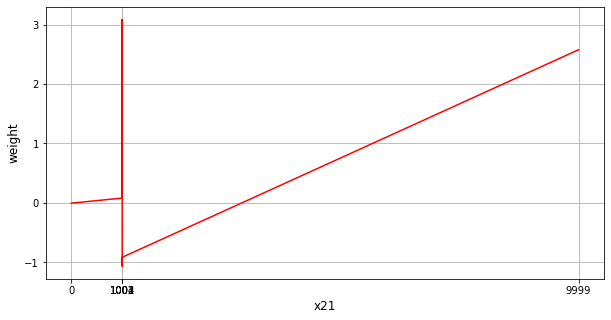

In [76]:
data['x21'] = data_orng['x21'].fillna(0)
a = screening('x21')

Variable:  x21


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(missing),6859.0,0.947768,6486.0,0.947553,373.0,0.951531,0.054381,-0.004189
b(not_missing),378.0,0.052232,359.0,0.052447,19.0,0.048469,0.050265,0.078872
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.0003303860876463243


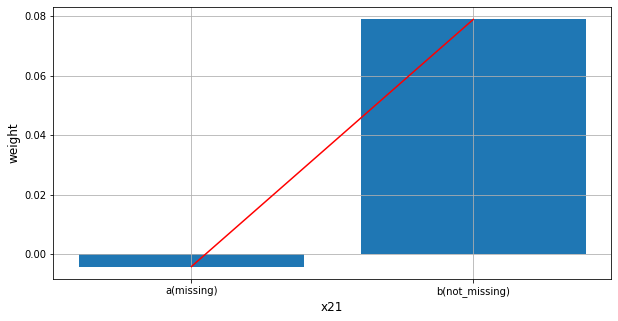

In [77]:
data['x21'] = data_orng['x21'].apply(lambda x: 'a(missing)' if np.isnan(x) else 'b(not_missing)' )
a = screening('x21')

IV不达标，不选。

### x22分析

In [78]:
a = screening('x22')

There is missing!


Variable:  x22


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
"(0,1000]",109.0,0.015061,105.0,0.015340,4.0,0.010204,0.036697,0.407654
"(1000,10000]",137.0,0.018930,130.0,0.018992,7.0,0.017857,0.051095,0.061612
"(10000,50000]",91.0,0.012574,87.0,0.012710,4.0,0.010204,0.043956,0.219602
"(200000,∞)",11.0,0.001520,9.0,0.001315,2.0,0.005102,0.181818,-1.355935
"(50000,200000]",25.0,0.003454,23.0,0.003360,2.0,0.005102,0.080000,-0.417665
missing,6864.0,0.948459,6491.0,0.948283,373.0,0.951531,0.054341,-0.003418
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.008587619018023534


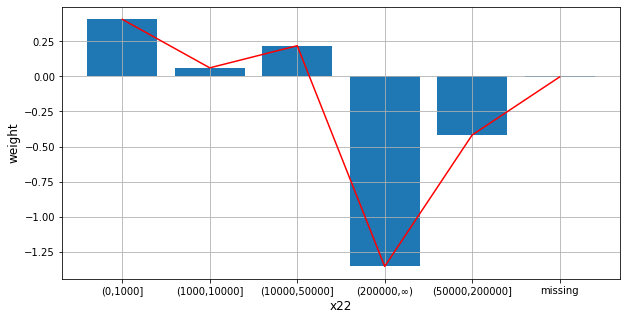

In [79]:
data['x22'] = data_orng['x22'].fillna('missing')
a = screening('x22')

Variable:  x22


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
"a(0,50000]",337.0,0.046566,322.0,0.047042,15.0,0.038265,0.044510,0.206489
"b(50000,200000]",25.0,0.003454,23.0,0.003360,2.0,0.005102,0.080000,-0.417665
"c(200000,∞)",11.0,0.001520,9.0,0.001315,2.0,0.005102,0.181818,-1.355935
missing,6864.0,0.948459,6491.0,0.948283,373.0,0.951531,0.054341,-0.003418
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.00768607235350737


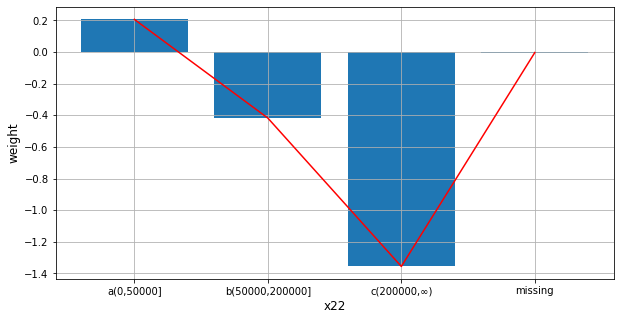

In [80]:
x22_map = {a[0].index[0]:'a(0,50000]',
           a[0].index[1]:'a(0,50000]',
           a[0].index[2]:'a(0,50000]',
          a[0].index[4]:'b(50000,200000]',
          a[0].index[3]:'c(200000,∞)',
          'missing':'missing'}
data['x22'] = data['x22'].map(x22_map)
a = screening('x22')

IV不达标，不选。

### x23分析

In [81]:
a = screening('x23')

There is missing!


Variable:  x23


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
"(0,1000]",67.0,0.009258,64.0,0.009350,3.0,0.007653,0.044776,0.200259
"(1000,10000]",130.0,0.017963,125.0,0.018262,5.0,0.012755,0.038462,0.358864
"(10000,50000)",109.0,0.015061,104.0,0.015194,5.0,0.012755,0.045872,0.174941
"[200000,∞)",20.0,0.002764,18.0,0.002630,2.0,0.005102,0.100000,-0.662787
"[50000,200000)",47.0,0.006494,43.0,0.006282,4.0,0.010204,0.085106,-0.485106
missing,6864.0,0.948459,6491.0,0.948283,373.0,0.951531,0.054341,-0.003418
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006294854651993178


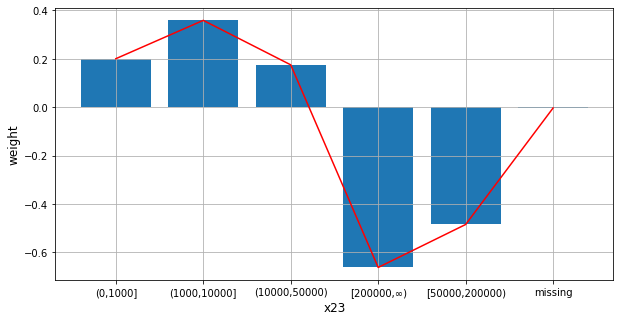

In [82]:
data['x23'] = data_orng['x23'].fillna('missing')
a = screening('x23')

Variable:  x23


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
"a(0,50000]",306.0,0.042283,293.0,0.042805,13.0,0.033163,0.042484,0.255211
"b(50000,200000]",47.0,0.006494,43.0,0.006282,4.0,0.010204,0.085106,-0.485106
"c(200000,∞)",20.0,0.002764,18.0,0.002630,2.0,0.005102,0.100000,-0.662787
missing,6864.0,0.948459,6491.0,0.948283,373.0,0.951531,0.054341,-0.003418
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.006013083400934421


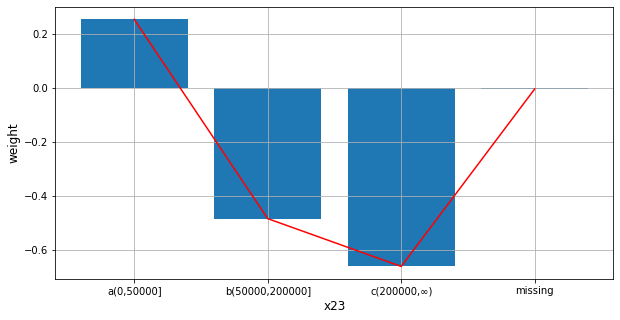

In [83]:
x23_map = {a[0].index[0]:'a(0,50000]',
           a[0].index[1]:'a(0,50000]',
           a[0].index[2]:'a(0,50000]',
          a[0].index[4]:'b(50000,200000]',
          a[0].index[3]:'c(200000,∞)',
          'missing':'missing'}
data['x23'] = data['x23'].map(x23_map)
a = screening('x23')

IV不达标，不选。

## x24分析

Variable:  x24


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
0,40.0,0.005527,38.0,0.005551,2.0000,0.005102,0.050000,0.084427
1,72.0,0.009949,70.0,0.010226,2.0000,0.005102,0.027778,0.695336
2,93.0,0.012851,78.0,0.011395,15.0000,0.038265,0.161290,-1.211353
3,91.0,0.012574,81.0,0.011833,10.0000,0.025510,0.109890,-0.768148
4,72.0,0.009949,63.0,0.009204,9.0000,0.022959,0.125000,-0.914102
...,...,...,...,...,...,...,...,...
180,2.0,0.000276,2.0,0.000292,0.0001,0.000100,0.000050,1.072214
181,1.0,0.000138,1.0,0.000146,0.0001,0.000100,0.000100,0.379067
182,1.0,0.000138,1.0,0.000146,0.0001,0.000100,0.000100,0.379067
183,3.0,0.000415,3.0,0.000438,0.0001,0.000100,0.000033,1.477679


Information Value =  1.2558602897076236


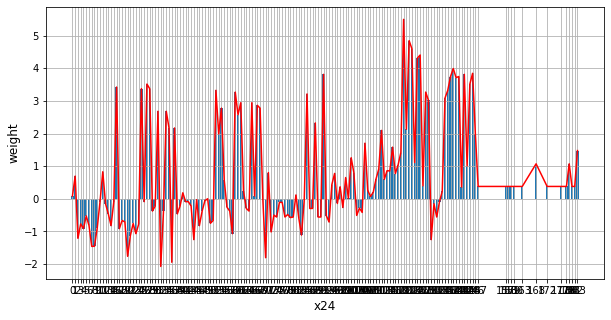

In [84]:
a = screening('x24')

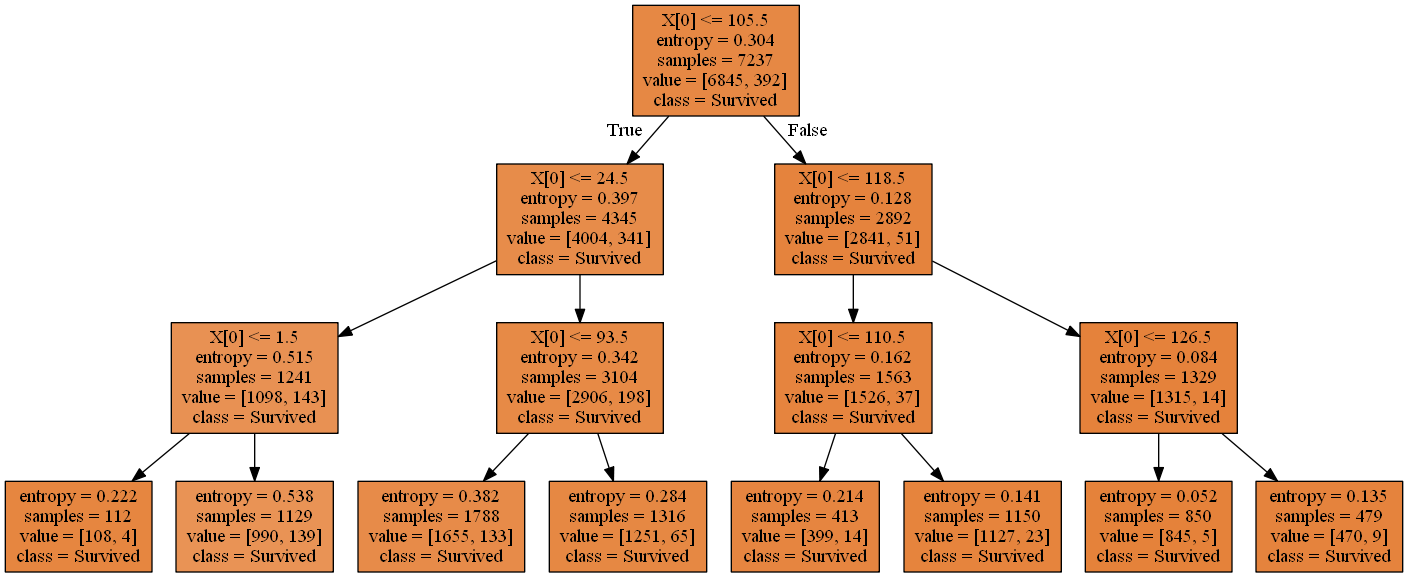

In [85]:
useTree('x24',3)

Variable:  x24


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(<=1.5),112.0,0.015476,108.0,0.015778,4.0,0.010204,0.035714,0.435825
b(<=24.5),1129.0,0.156004,990.0,0.144631,139.0,0.354592,0.123118,-0.896781
c(<=93.5),1788.0,0.247064,1655.0,0.241782,133.0,0.339286,0.074385,-0.338805
d(<=105.5),1316.0,0.181843,1251.0,0.182761,65.0,0.165816,0.049392,0.097299
e(<=110.5),413.0,0.057068,399.0,0.058291,14.0,0.035714,0.033898,0.489892
f(<=118.5),1150.0,0.158906,1127.0,0.164646,23.0,0.058673,0.020000,1.031808
g(<=126.5),850.0,0.117452,845.0,0.123448,5.0,0.012755,0.005882,2.269887
h(>126.5),479.0,0.066188,470.0,0.068663,9.0,0.022959,0.018789,1.095496
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.6471328757362408


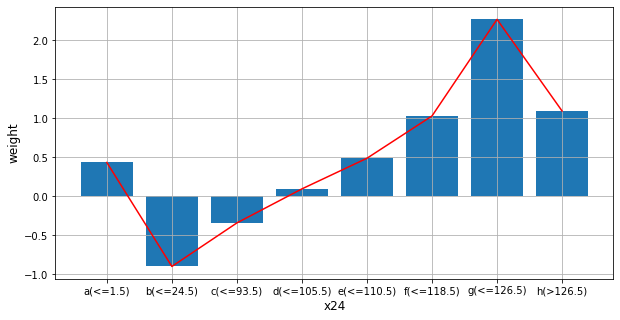

In [86]:
gpBins = [-1000,1.5,24.5,93.5,105.5,110.5,118.5,126.5,1000]
gpLabels = ['a(<=1.5)','b(<=24.5)','c(<=93.5)','d(<=105.5)','e(<=110.5)','f(<=118.5)','g(<=126.5)','h(>126.5)']
data['x24'] = pd.cut(data_orng['x24'],bins = gpBins,labels = gpLabels)
a = screening('x24')

Variable:  x24


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(<=24.5),1241.0,0.171480,1098.0,0.160409,143.0,0.364796,0.115230,-0.821611
b(<=93.5),1788.0,0.247064,1655.0,0.241782,133.0,0.339286,0.074385,-0.338805
c(<=105.5),1316.0,0.181843,1251.0,0.182761,65.0,0.165816,0.049392,0.097299
d(<=110.5),413.0,0.057068,399.0,0.058291,14.0,0.035714,0.033898,0.489892
e(<=118.5),1150.0,0.158906,1127.0,0.164646,23.0,0.058673,0.020000,1.031808
f(>118.5),1329.0,0.183640,1315.0,0.192111,14.0,0.035714,0.010534,1.682523
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.586153964777645


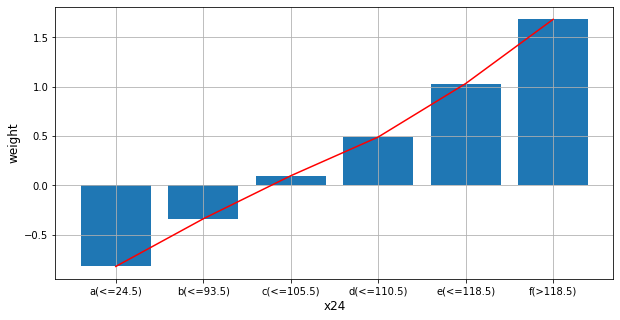

In [87]:
gpBins = [-1000,24.5,93.5,105.5,110.5,118.5,1000]
gpLabels = ['a(<=24.5)','b(<=93.5)','c(<=105.5)','d(<=110.5)','e(<=118.5)','f(>118.5)']
data['x24'] = pd.cut(data_orng['x24'],bins = gpBins,labels = gpLabels)
a = screening('x24')

IV达标，趋势合理，选入。

In [88]:
gpDict['x24'] = ['bin',gpBins,gpLabels]
run1Df['x24'] = data['x24']

### x25分析

Variable:  x25


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
22,142.0,0.019621,135.0,0.019722,7.0000,0.017857,0.049296,0.099353
23,320.0,0.044217,312.0,0.045581,8.0000,0.020408,0.025000,0.803550
24,428.0,0.059141,408.0,0.059606,20.0000,0.051020,0.046729,0.155523
25,458.0,0.063286,431.0,0.062966,27.0000,0.068878,0.058952,-0.089741
26,462.0,0.063839,442.0,0.064573,20.0000,0.051020,0.043290,0.235566
27,434.0,0.059970,410.0,0.059898,24.0000,0.061224,0.055300,-0.021909
28,409.0,0.056515,387.0,0.056538,22.0000,0.056122,0.053790,0.007370
29,475.0,0.065635,459.0,0.067056,16.0000,0.040816,0.033684,0.496450
30,507.0,0.070057,481.0,0.070270,26.0000,0.066327,0.051282,0.057759
31,397.0,0.054857,375.0,0.054785,22.0000,0.056122,0.055416,-0.024128


Information Value =  0.10748827957618345


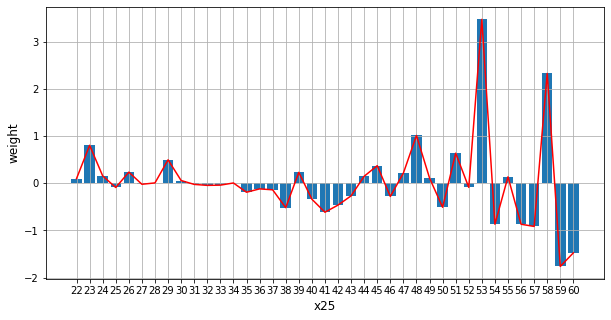

In [89]:
a = screening('x25')

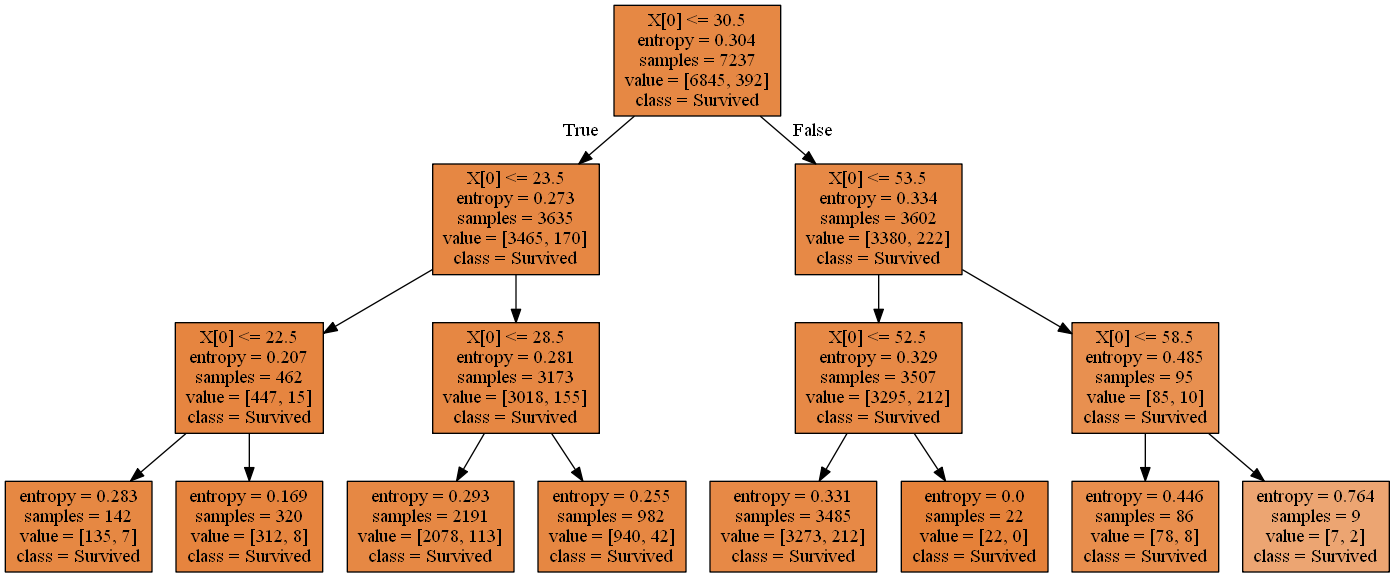

In [90]:
useTree('x25',3)

Variable:  x25


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(<=22.5),142.0,0.019621,135.0,0.019722,7.0,0.017857,0.049296,0.099353
b(<=23.5),320.0,0.044217,312.0,0.045581,8.0,0.020408,0.025000,0.803550
c(<=28.5),2191.0,0.302750,2078.0,0.303579,113.0,0.288265,0.051575,0.051761
d(<=30.5),982.0,0.135692,940.0,0.137327,42.0,0.107143,0.042770,0.248198
e(<=52.5),3485.0,0.481553,3273.0,0.478159,212.0,0.540816,0.060832,-0.123136
f(<=53.5),22.0,0.003040,22.0,0.003214,0.0,0.000000,0.000000,inf
g(<=58.5),86.0,0.011883,78.0,0.011395,8.0,0.020408,0.093023,-0.582745
h(>58.5),9.0,0.001244,7.0,0.001023,2.0,0.005102,0.222222,-1.607249
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  inf


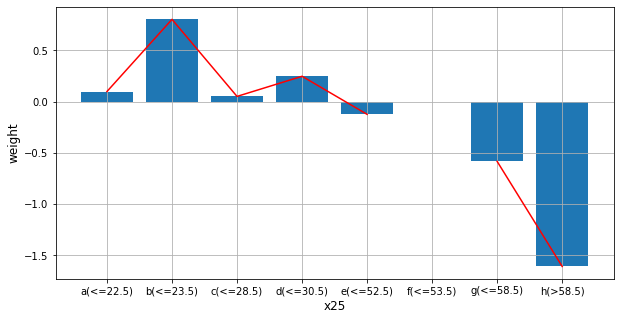

In [91]:
gpBins = [-1000,22.5,23.5,28.5,30.5,52.5,53.5,58.5,1000]
gpLabels = ['a(<=22.5)','b(<=23.5)','c(<=28.5)','d(<=30.5)','e(<=52.5)','f(<=53.5)','g(<=58.5)','h(>58.5)']
data['x25'] = pd.cut(data_orng['x25'],bins = gpBins,labels = gpLabels)
a = screening('x25')

Variable:  x25


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(<=23),462.0,0.063839,447.0,0.065303,15.0,0.038265,0.032468,0.534496
b(<=30),3173.0,0.438441,3018.0,0.440906,155.0,0.395408,0.048850,0.108913
c(<=53),3507.0,0.484593,3295.0,0.481373,212.0,0.540816,0.060451,-0.116437
d(>53),95.0,0.013127,85.0,0.012418,10.0,0.025510,0.105263,-0.719946
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.03575405098358199


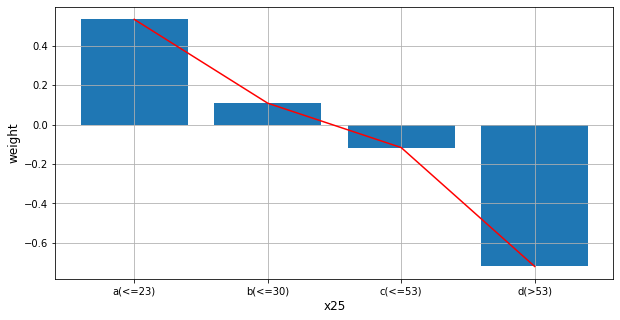

In [92]:
gpBins = [-1000,23.5,30.5,53.5,1000]
gpLabels = ['a(<=23)','b(<=30)','c(<=53)','d(>53)']
data['x25'] = pd.cut(data_orng['x25'],bins = gpBins,labels = gpLabels)
a = screening('x25')

Variable:  x25


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
a(<=23),462.0,0.063839,447.0,0.065303,15.0,0.038265,0.032468,0.534496
b(<=30),3173.0,0.438441,3018.0,0.440906,155.0,0.395408,0.048850,0.108913
c(<=43),2995.0,0.413846,2807.0,0.410080,188.0,0.479592,0.062771,-0.156582
d(<=53),512.0,0.070748,488.0,0.071293,24.0,0.061224,0.046875,0.152250
e(>53),95.0,0.013127,85.0,0.012418,10.0,0.025510,0.105263,-0.719946
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.041249877261711906


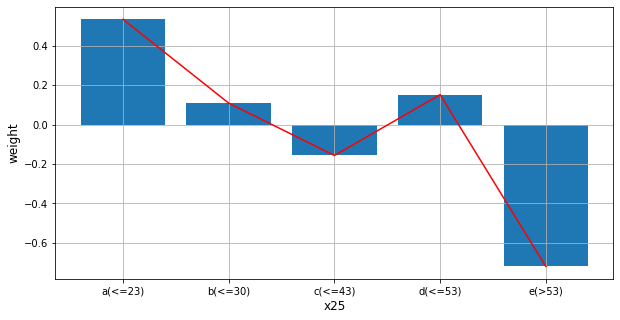

In [93]:
gpBins = [-1000,23,30,43,53,1000]
gpLabels = ['a(<=23)','b(<=30)','c(<=43)','d(<=53)','e(>53)']
data['x25'] = pd.cut(data_orng['x25'],bins = gpBins,labels = gpLabels)
a = screening('x25')

IV达标，趋势合理，选入。

In [94]:
gpDict['x25'] = ['bin', gpBins, gpLabels]
run1Df['x25'] = data['x25']

### x26分析

Variable:  x26


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
11,2.0,0.000276,2.0,0.000292,0.0001,0.000100,0.000050,1.072214
12,4.0,0.000553,3.0,0.000438,1.0000,0.002551,0.250000,-1.761400
13,27.0,0.003731,24.0,0.003506,3.0000,0.007653,0.111111,-0.780570
14,33.0,0.004560,31.0,0.004529,2.0000,0.005102,0.060606,-0.119172
15,10.0,0.001382,8.0,0.001169,2.0000,0.005102,0.200000,-1.473718
21,11.0,0.001520,11.0,0.001607,0.0001,0.000100,0.000009,2.776962
22,22.0,0.003040,20.0,0.002922,2.0000,0.005102,0.090909,-0.557427
23,55.0,0.007600,48.0,0.007012,7.0000,0.017857,0.127273,-0.934721
31,7.0,0.000967,6.0,0.000877,1.0000,0.002551,0.142857,-1.068252
32,154.0,0.021280,151.0,0.022060,3.0000,0.007653,0.019481,1.058656


Information Value =  0.14121668082689312


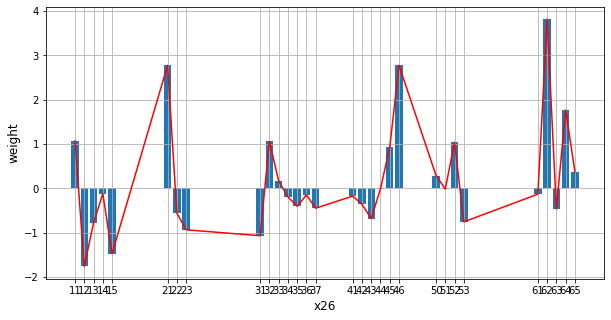

In [95]:
a = screening('x26')

这个变量应该不是纯数值，不知道怎么弄

### x27分析

Variable:  x27


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
0,5482.0,0.757496,5161.0,0.753981,321.0,0.818878,0.058555,-0.082567
1,1755.0,0.242504,1684.0,0.246019,71.0,0.181122,0.040456,0.306235
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.025231957800985153


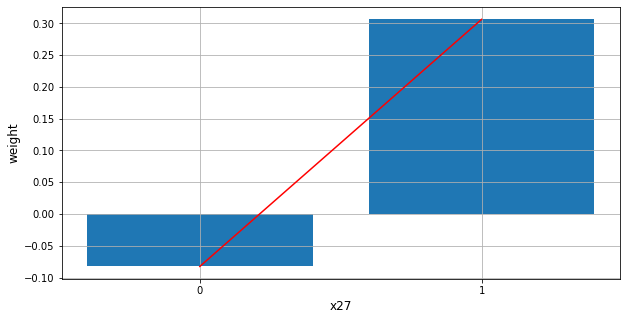

In [96]:
a = screening('x27')

IV达标，趋势合理，选入。

In [97]:
run1Df['x27'] = data['x27']

### x28分析

Variable:  x28


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
0,3198.0,0.441896,2993.0,0.437253,205.0,0.522959,0.064103,-0.178990
1,4039.0,0.558104,3852.0,0.562747,187.0,0.477041,0.046299,0.165227
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.02950141751906432


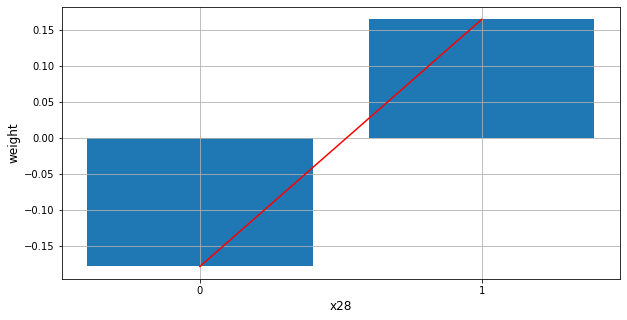

In [98]:
a = screening('x28')

IV达标，趋势合理，选入。

In [99]:
run1Df['x28'] = data['x28']

### x29分析

Variable:  x29


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
0,4013.0,0.554512,3808.0,0.556318,205.0,0.522959,0.051084,0.061838
1,3224.0,0.445488,3037.0,0.443682,187.0,0.477041,0.058002,-0.072495
Total,7237.0,1.000000,6845.0,1.000000,392.0,1.000000,0.054166,0.000000


Information Value =  0.004481240047970094


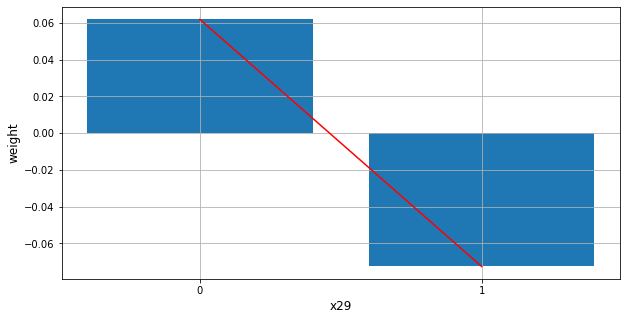

In [100]:
a = screening('x29')

IV不达标，不选。

### x30分析

Variable:  x30


,Count,Tot Distr,Goods,Distr Good,Bads,Distr Bad,Bad rate,WOE
0,6109.0,0.844134,5801.0,0.84748,308.0,0.785714,0.050417,0.075674
1,1128.0,0.155866,1044.0,0.15252,84.0,0.214286,0.074468,-0.340014
Total,7237.0,1.000000,6845.0,1.00000,392.0,1.000000,0.054166,0.000000


Information Value =  0.025675220098977


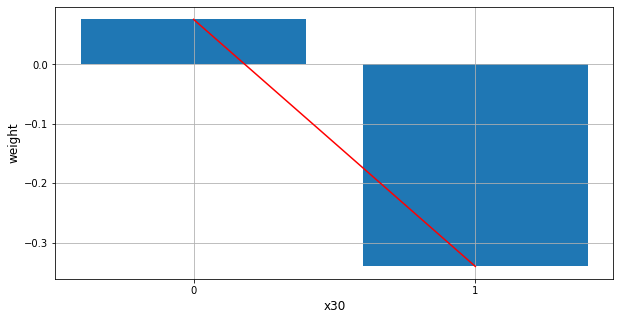

In [101]:
a = screening('x30')

IV达标，趋势合理，选入。

In [102]:
run1Df['x30'] = data['x30']

### 初筛结果

In [103]:
run1Df

,x3,x5,x8,x10,x12,x15,x17,x18,x19,x20,x24,x25,x27,x28,x30
0,b(4-8),a(2-6),d(9-10),D,b,b(9-10),c(5-6),a(1-2),c(3-5),a(1),b(<=93.5),a(<=23),0,1,0
1,b(4-8),a(1-3),b(5-6),D,d,b(9-10),d(7-9),a(1-2),a(1),a(1),f(>118.5),b(<=30),1,1,0
2,c(9-10),b(7-10),d(9-10),A,c,b(9-10),d(7-9),a(1-2),b(2),a(1),f(>118.5),b(<=30),0,1,0
3,b(4-8),a(1-3),b(5-6),D,e,b(9-10),c(5-6),a(1-2),a(1),a(1),f(>118.5),b(<=30),0,1,0
4,b(4-8),a(2-6),b(5-6),D,e,a(1-8),c(5-6),a(1-2),a(1),a(1),b(<=93.5),b(<=30),0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7232,b(4-8),a(2-6),c(7-8),C,a,b(9-10),c(5-6),a(1-2),a(1),a(1),a(<=24.5),c(<=43),1,1,0
7233,c(9-10),a(2-6),d(9-10),B,a,b(9-10),d(7-9),a(1-2),c(3-5),a(1),a(<=24.5),c(<=43),0,1,1
7234,c(9-10),b(7-10),b(5-6),A,b,b(9-10),c(5-6),a(1-2),a(1),a(1),a(<=24.5),b(<=30),0,1,0
7235,a(1-3),b(7-10),c(7-8),D,e,b(9-10),c(5-6),a(1-2),a(1),a(1),a(<=24.5),c(<=43),1,0,0


## 2. Logistic regression and selection

In [104]:
if 'x24' in run1Df.columns: #x24不能用，所以要删除
    run1Df = run1Df.drop('x24',axis = 1)

'''
#此为在计算WOE之前分测试集

allData = data[run1Df.columns]

#划分训练集和测试集，测试集20%
data_train, data_test, Y_train, Y_test = train_test_split(allData.values, data_orng['label'].values, 
                                                          test_size=0.2)

data_train_df = pd.DataFrame(data_train, columns = allData.columns)
data_test_df = pd.DataFrame(data_test, columns = allData.columns)
X_train_df = pd.DataFrame()
X_test_df = pd.DataFrame()
woeMap = {}
IVDf = pd.DataFrame(index = ['IV'])
for name in run1Df.columns:
    a = screening(name,False,data_train_df)
    woeMap[name] = dict(zip(list(a[0].index)[:-1],list(a[0]['WOE'].values)[:-1]))
    X_train_df[name] = data_train_df[name].copy().map(woeMap[name])
    X_test_df[name] = data_test_df[name].copy().map(woeMap[name])
    IVDf[name] = a[1]
'''

In [105]:
#先算WOE再分测试集

woeDf = pd.DataFrame()
woeMap = {}
IVDf = pd.DataFrame(index = ['IV'])
for name in run1Df.columns:
    a = screening(name,False,run1Df)
    woeMap[name] = dict(zip(list(a[0].index)[:-1],list(a[0]['WOE'].values)[:-1]))
    woeDf[name] = run1Df[name].copy().map(woeMap[name])
    IVDf[name] = a[1]

In [106]:
IVDf.T.sort_values('IV') 

,IV
x3,0.021141
x15,0.022609
x5,0.023404
x18,0.024675
x27,0.025232
x30,0.025675
x28,0.029501
x25,0.041250
x8,0.051466
x10,0.077012


In [107]:
woeDf #用WOE值作为变量值

,x3,x5,x8,x10,x12,x15,x17,x18,x19,x20,x25,x27,x28,x30
0,-0.060354,0.005359,-0.227108,-0.126852,0.571538,0.078881,-0.102771,0.021402,-0.469775,0.078647,0.534496,-0.082567,0.165227,0.075674
1,-0.060354,0.120517,0.254220,-0.126852,-0.326315,0.078881,-0.173155,0.021402,0.261225,0.078647,0.108913,0.306235,0.165227,0.075674
2,0.220171,-0.293316,-0.227108,1.035882,-0.214929,0.078881,-0.173155,0.021402,-0.372657,0.078647,0.108913,-0.082567,0.165227,0.075674
3,-0.060354,0.120517,0.254220,-0.126852,-0.433995,0.078881,-0.102771,0.021402,0.261225,0.078647,0.108913,-0.082567,0.165227,0.075674
4,-0.060354,0.005359,0.254220,-0.126852,-0.433995,-0.287164,-0.102771,0.021402,0.261225,0.078647,0.108913,-0.082567,-0.178990,0.075674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7232,-0.060354,0.005359,0.012167,0.099495,1.586553,0.078881,-0.102771,0.021402,0.261225,0.078647,-0.156582,0.306235,0.165227,0.075674
7233,0.220171,0.005359,-0.227108,0.685349,1.586553,0.078881,-0.173155,0.021402,-0.469775,0.078647,-0.156582,-0.082567,0.165227,-0.340014
7234,0.220171,-0.293316,0.254220,1.035882,0.571538,0.078881,-0.102771,0.021402,0.261225,0.078647,0.108913,-0.082567,0.165227,0.075674
7235,-0.162090,-0.293316,0.012167,-0.126852,-0.433995,0.078881,-0.102771,0.021402,0.261225,0.078647,-0.156582,0.306235,-0.178990,0.075674


In [108]:
#划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(woeDf.values, data_orng['label'].values,
                                                    test_size=0.2,random_state = 50,
                                                   stratify = data_orng['label'])

In [109]:
X_train_df = pd.DataFrame(X_train, columns = woeDf.columns)
display(X_train_df)

,x3,x5,x8,x10,x12,x15,x17,x18,x19,x20,x25,x27,x28,x30
0,-0.16209,0.120517,0.25422,-0.126852,-0.433995,0.078881,-0.102771,0.0214017,0.261225,0.0786467,0.108913,0.306235,-0.17899,0.0756739
1,-0.0603539,0.120517,0.0121674,0.0994952,-0.326315,0.078881,-0.173155,0.0214017,0.261225,0.0786467,0.15225,-0.0825674,0.165227,0.0756739
2,-0.0603539,0.120517,-0.227108,0.0994952,-0.214929,0.078881,-0.173155,0.0214017,0.261225,0.0786467,0.108913,-0.0825674,0.165227,0.0756739
3,-0.0603539,0.120517,-0.227108,0.685349,0.571538,0.078881,0.807548,0.0214017,0.261225,0.0786467,0.108913,-0.0825674,-0.17899,0.0756739
4,-0.0603539,0.00535856,0.0121674,-0.126852,-0.326315,0.078881,-0.173155,0.0214017,0.261225,-1.16669,-0.156582,-0.0825674,0.165227,0.0756739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784,-0.0603539,0.120517,0.25422,-0.126852,-0.326315,0.078881,-0.173155,0.0214017,0.261225,-0.914102,0.108913,0.306235,-0.17899,0.0756739
5785,-0.16209,0.00535856,-0.227108,-0.126852,0.571538,-0.287164,0.807548,0.0214017,0.261225,0.0786467,-0.156582,-0.0825674,-0.17899,-0.340014
5786,-0.0603539,0.120517,0.0121674,-0.126852,-0.214929,0.078881,0.807548,0.0214017,0.261225,0.0786467,0.108913,-0.0825674,-0.17899,0.0756739
5787,0.220171,0.120517,0.0121674,-0.126852,-0.433995,-0.287164,-0.102771,0.0214017,-0.469775,0.0786467,-0.156582,-0.0825674,-0.17899,-0.340014


In [110]:
X_test_df = pd.DataFrame(X_test, columns = woeDf.columns)
display(X_test_df)

,x3,x5,x8,x10,x12,x15,x17,x18,x19,x20,x25,x27,x28,x30
0,-0.0603539,0.00535856,0.0121674,0.0994952,0.571538,0.078881,-0.102771,0.0214017,0.261225,0.0786467,0.534496,-0.0825674,0.165227,-0.340014
1,0.220171,0.120517,0.0121674,-0.126852,0.571538,0.078881,-0.102771,0.0214017,0.261225,0.0786467,-0.156582,-0.0825674,-0.17899,0.0756739
2,-0.16209,0.00535856,-0.227108,0.685349,1.58655,-0.287164,0.807548,0.0214017,0.261225,0.0786467,-0.156582,-0.0825674,-0.17899,0.0756739
3,-0.0603539,0.00535856,-0.227108,-0.126852,1.58655,0.078881,-0.173155,0.0214017,0.261225,0.0786467,0.108913,-0.0825674,0.165227,-0.340014
4,-0.0603539,-0.293316,0.25422,-0.126852,-0.214929,0.078881,-0.102771,0.0214017,0.261225,0.0786467,-0.156582,0.306235,-0.17899,0.0756739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,0.220171,0.00535856,0.0121674,0.0994952,1.58655,0.078881,-0.173155,0.0214017,-0.469775,-0.914102,0.108913,-0.0825674,-0.17899,0.0756739
1444,-0.0603539,0.120517,0.605724,0.685349,-0.214929,0.078881,0.807548,0.0214017,0.261225,0.0786467,0.108913,0.306235,-0.17899,0.0756739
1445,-0.16209,0.120517,0.605724,-0.126852,-0.433995,-0.287164,0.18621,0.0214017,0.261225,0.0786467,-0.156582,-0.0825674,-0.17899,0.0756739
1446,0.220171,0.00535856,-0.227108,-0.126852,0.571538,0.078881,-0.173155,0.0214017,0.261225,0.0786467,0.534496,-0.0825674,0.165227,0.0756739


In [111]:
X_all_df = woeDf
Y_all = data_orng['label'].values

In [112]:
methodDict = {} #存放回归方法和结果

'''
Forward selection
enterAlpha = 0.01 #进入门槛为0.1
cnt = 1
enteredList = []
candidateList = IVDf.T.sort_values('IV').index.to_list() 
y = Y_train

while cnt > 0:
    
    cnt = 0
    pDf = pd.DataFrame(index = ['pvalue'])

    for name in candidateList:
        regList = enteredList + [name]
        x = sm.add_constant(X_train_df[regList].values).astype(float)
        logit = sm.Logit(y,x).fit(disp = 0)
        pvalue = logit.pvalues[-1]
        if pvalue < enterAlpha:
            cnt += 1
            pDf[name] = pvalue
    if cnt > 0:
        pDf = pDf.T.sort_values('pvalue')
        bestName = pDf.index[0]
        enteredList += [bestName]
        candidateList.remove(bestName)
        
x = sm.add_constant(X_train_df[enteredList].values).astype(float)
logit = sm.Logit(y,x).fit(disp = 0)
display(logit.summary(xname = ['const'] + enteredList))

methodDict['Forward selection'] = [enteredList, logit]
'''

In [113]:
#Backward elimination

paraList = [0.2, 0.15, 0.1, 0.05, 0.01] #剔除门槛

for outAlpha in paraList:
    print('\n','Out alpha:',outAlpha)
    enteredList = IVDf.T.sort_values('IV').index.to_list() 
    cnt = 1
    y = Y_train

    while cnt > 0:

        cnt = 0
        pDf = pd.DataFrame(index = ['pvalue'])

        x = sm.add_constant(X_train_df[enteredList].values).astype(float)
        logit = sm.Logit(y,x).fit(disp = 0)
        regList = ['const']+enteredList
        for i in range(len(regList)):
            pDf[regList[i]] = logit.pvalues[i]

        pDf = pDf.T

        outList = pDf[pDf['pvalue'] > outAlpha].index
        cnt = len(outList)

        if cnt > 0:
            worstName = pDf.sort_values('pvalue').index[-1]
            enteredList.remove(worstName)

    x = sm.add_constant(X_train_df[enteredList].values).astype(float)
    logit = sm.Logit(y,x).fit(disp = 0)
    display(logit.summary(xname = ['const'] + enteredList))

    methodDict['BE ' + str(outAlpha)] = [enteredList, logit]


 Out alpha: 0.2


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5789
Model:                          Logit   Df Residuals:                     5776
Method:                           MLE   Df Model:                           12
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.08784
Time:                        15:46:55   Log-Likelihood:                -1113.2
converged:                       True   LL-Null:                       -1220.4
Covariance Type:            nonrobust   LLR p-value:                 3.419e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8682      0.065    -44.341      0.000      -2.995      -2.741
x15           -0.6344      0.393     -1.615      0.106      -1.404       0.135
x5            -0.6664      0.386     -1.724      0.085      -1.424       0.091
x27           -0.5241      0.387     -1.353      0.176      -1.283       0.235
x30           -0.5503      0.366     -1.505      0.132      -1.267       0.166
x28           -1.0672      0.350     -3.053      0.002      -1.752      -0.382
x25           -1.0444      0.296     -3.534      0.000      -1.624      -0.465
x8            -1.0719      0.287     -3.737      0.000      -1.634      -0.510
x10           -0.4564      0.274     -1.663      0.096      -0.994       0.081
x20           -0.9972      0.178     -5.610      0.000      -1.346      -0.649
x17           -0.8785      0.220     -3.990      0.000      -1.310      -0.447
x19           -0.6824      0.171     -3.990      0.000      -1.018      -0.347
x12           -0.9661      0.145     -6.686      0.000      -1.249      -0.683
==============================================================================
"""


 Out alpha: 0.15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5789
Model:                          Logit   Df Residuals:                     5777
Method:                           MLE   Df Model:                           11
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.08707
Time:                        15:46:55   Log-Likelihood:                -1114.2
converged:                       True   LL-Null:                       -1220.4
Covariance Type:            nonrobust   LLR p-value:                 1.859e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8708      0.065    -44.391      0.000      -2.998      -2.744
x15           -0.6147      0.393     -1.566      0.117      -1.384       0.155
x5            -0.6966      0.386     -1.805      0.071      -1.453       0.060
x30           -0.5921      0.365     -1.624      0.104      -1.307       0.122
x28           -1.0502      0.349     -3.005      0.003      -1.735      -0.365
x25           -1.0565      0.295     -3.576      0.000      -1.636      -0.477
x8            -1.1301      0.284     -3.975      0.000      -1.687      -0.573
x10           -0.4558      0.274     -1.661      0.097      -0.993       0.082
x20           -1.0097      0.177     -5.689      0.000      -1.358      -0.662
x17           -0.8765      0.220     -3.975      0.000      -1.309      -0.444
x19           -0.6864      0.171     -4.013      0.000      -1.022      -0.351
x12           -0.9610      0.144     -6.659      0.000      -1.244      -0.678
==============================================================================
"""


 Out alpha: 0.1


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5789
Model:                          Logit   Df Residuals:                     5779
Method:                           MLE   Df Model:                            9
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.08498
Time:                        15:46:55   Log-Likelihood:                -1116.7
converged:                       True   LL-Null:                       -1220.4
Covariance Type:            nonrobust   LLR p-value:                 9.139e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8674      0.064    -44.574      0.000      -2.994      -2.741
x5            -0.6800      0.385     -1.765      0.078      -1.435       0.075
x30           -0.6127      0.364     -1.682      0.093      -1.327       0.101
x28           -1.0141      0.348     -2.910      0.004      -1.697      -0.331
x25           -1.0764      0.295     -3.649      0.000      -1.655      -0.498
x8            -1.0807      0.282     -3.829      0.000      -1.634      -0.528
x20           -0.9984      0.177     -5.630      0.000      -1.346      -0.651
x17           -0.8550      0.218     -3.923      0.000      -1.282      -0.428
x19           -0.7278      0.170     -4.276      0.000      -1.061      -0.394
x12           -1.0374      0.141     -7.346      0.000      -1.314      -0.761
==============================================================================
"""


 Out alpha: 0.05


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5789
Model:                          Logit   Df Residuals:                     5780
Method:                           MLE   Df Model:                            8
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.08387
Time:                        15:46:55   Log-Likelihood:                -1118.1
converged:                       True   LL-Null:                       -1220.4
Covariance Type:            nonrobust   LLR p-value:                 6.512e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8678      0.064    -44.609      0.000      -2.994      -2.742
x5            -0.7549      0.382     -1.976      0.048      -1.504      -0.006
x28           -0.9950      0.348     -2.858      0.004      -1.677      -0.313
x25           -1.1226      0.294     -3.818      0.000      -1.699      -0.546
x8            -1.1324      0.281     -4.031      0.000      -1.683      -0.582
x20           -1.0129      0.177     -5.721      0.000      -1.360      -0.666
x17           -0.8443      0.218     -3.875      0.000      -1.271      -0.417
x19           -0.7318      0.170     -4.301      0.000      -1.065      -0.398
x12           -1.0364      0.141     -7.336      0.000      -1.313      -0.759
==============================================================================
"""


 Out alpha: 0.01


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5789
Model:                          Logit   Df Residuals:                     5781
Method:                           MLE   Df Model:                            7
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.08232
Time:                        15:46:55   Log-Likelihood:                -1120.0
converged:                       True   LL-Null:                       -1220.4
Covariance Type:            nonrobust   LLR p-value:                 7.304e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8696      0.064    -44.669      0.000      -2.995      -2.744
x28           -0.9689      0.348     -2.787      0.005      -1.650      -0.287
x25           -1.1261      0.293     -3.841      0.000      -1.701      -0.552
x8            -1.2099      0.279     -4.344      0.000      -1.756      -0.664
x20           -1.0187      0.177     -5.760      0.000      -1.365      -0.672
x17           -0.8355      0.218     -3.830      0.000      -1.263      -0.408
x19           -0.7447      0.170     -4.384      0.000      -1.078      -0.412
x12           -1.0358      0.141     -7.336      0.000      -1.313      -0.759
==============================================================================
"""

'''
 (3) Stepwise
testList = IVDf.T.sort_values('IV').index.to_list() #IV低的放在前面进入
enterAlpha = 0.01 #进入门槛为0.1
outAlpha = 0.01 #剔除门槛为0.1
cnt = 1
enteredList = []
candidateList = testList
y = Y_train

while cnt > 0:
    
    cnt = 0
    pDf = pd.DataFrame(index = ['const'] + enteredList + ['new'])

    for name in candidateList:
        regList = enteredList + [name]
        x = sm.add_constant(X_train_df[regList].values).astype(float)
        logit = sm.Logit(y,x).fit(disp = 0)
        
        pDf[name] = logit.pvalues
        
        if pDf.loc['new',name] < enterAlpha:
            cnt += 1
    if cnt > 0:
        pDf = pDf.T.sort_values('new')
        bestName = pDf.index[0]
        enteredList += [bestName]
        candidateList.remove(bestName)
        pDf = pDf.T
        worsenList = pDf[pDf.iloc[:,0] > outAlpha].index.to_list()
        for name in worsenList:
            enteredList.remove(name)
            candidateList += [name]

x = sm.add_constant(X_train_df[enteredList].values).astype(float)
logit = sm.Logit(y,x).fit(disp = 0)
display(logit.summary(xname = ['const'] + enteredList))

methodDict['Stepwise'] = [enteredList, logit]
'''

## 展示结果

In [114]:
def getBins(arr, interval):
    b = np.array((range(0,1000,interval)))
    arrMin = arr.min()
    arrMax = arr.max()
    floor = b[np.where(b < arrMin)[0][-1]]
    ceiling = b[np.where(b > arrMax)[0][0]]
    bins = list(range(floor,ceiling+1,interval))
    labels = ['{0}-{1}'.format(x,x+interval) for x in bins[:-1]]
    return bins,labels


 Score =  300 +  28 * ln(P(Good) / P(Bad)) 


 Method 1:  BE 0.2 


 Train  Sample 



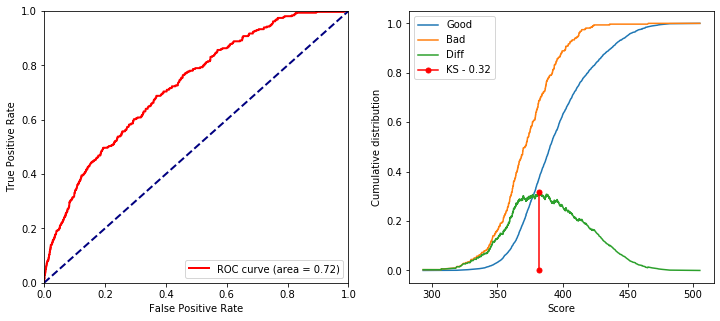

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
290-300,1,1,0,0,1,1,1.000000,1.000000,0.999827
300-310,4,5,3,3,1,2,0.250000,0.400000,0.999136
310-320,5,10,2,5,3,5,0.600000,0.500000,0.998273
320-330,28,38,19,24,9,14,0.321429,0.368421,0.993436
330-340,43,81,32,56,11,25,0.255814,0.308642,0.986008
340-350,148,229,123,179,25,50,0.168919,0.218341,0.960442
350-360,330,559,286,465,44,94,0.133333,0.168157,0.903438
360-370,662,1221,600,1065,62,156,0.093656,0.127764,0.789083
370-380,857,2078,810,1875,47,203,0.054842,0.097690,0.641043



 Test  Sample 



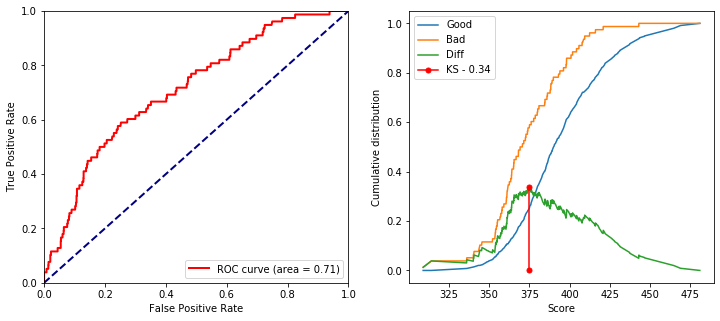

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
300-310,1,1,0,0,1,1,1.000000,1.000000,0.999309
310-320,3,4,1,1,2,3,0.666667,0.750000,0.997238
320-330,6,10,6,7,0,3,0.000000,0.300000,0.993094
330-340,12,22,11,18,1,4,0.083333,0.181818,0.984807
340-350,40,62,35,53,5,9,0.125000,0.145161,0.957182
350-360,92,154,80,133,12,21,0.130435,0.136364,0.893646
360-370,147,301,129,262,18,39,0.122449,0.129568,0.792127
370-380,212,513,201,463,11,50,0.051887,0.097466,0.645718
380-390,231,744,220,683,11,61,0.047619,0.081989,0.486188



 All  Sample 



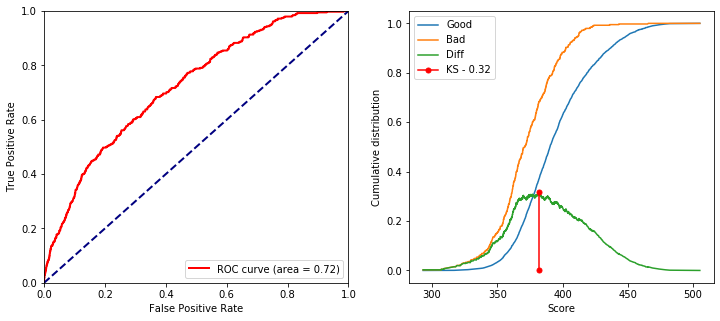

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
290-300,1,1,0,0,1,1,1.000000,1.000000,0.999862
300-310,5,6,3,3,2,3,0.400000,0.500000,0.999171
310-320,8,14,3,6,5,8,0.625000,0.571429,0.998065
320-330,34,48,25,31,9,17,0.264706,0.354167,0.993367
330-340,55,103,43,74,12,29,0.218182,0.281553,0.985768
340-350,188,291,158,232,30,59,0.159574,0.202749,0.959790
350-360,422,713,366,598,56,115,0.132701,0.161290,0.901479
360-370,809,1522,729,1327,80,195,0.098888,0.128121,0.789692
370-380,1069,2591,1011,2338,58,253,0.054256,0.097646,0.641979



 Method 2:  BE 0.15 


 Train  Sample 



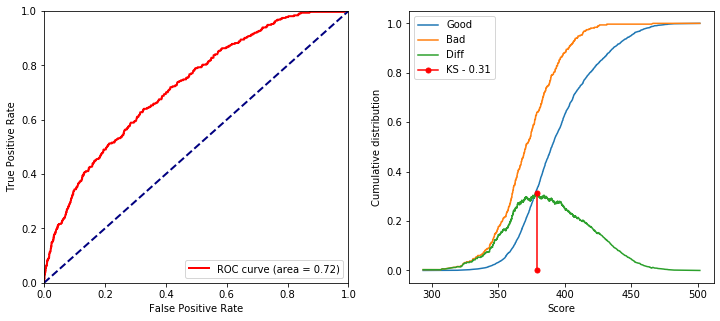

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
290-300,1,1,0,0,1,1,1.000000,1.000000,0.999827
300-310,4,5,3,3,1,2,0.250000,0.400000,0.999136
310-320,5,10,2,5,3,5,0.600000,0.500000,0.998273
320-330,24,34,17,22,7,12,0.291667,0.352941,0.994127
330-340,47,81,35,57,12,24,0.255319,0.296296,0.986008
340-350,148,229,118,175,30,54,0.202703,0.235808,0.960442
350-360,327,556,289,464,38,92,0.116208,0.165468,0.903956
360-370,664,1220,603,1067,61,153,0.091867,0.125410,0.789255
370-380,838,2058,789,1856,49,202,0.058473,0.098154,0.644498



 Test  Sample 



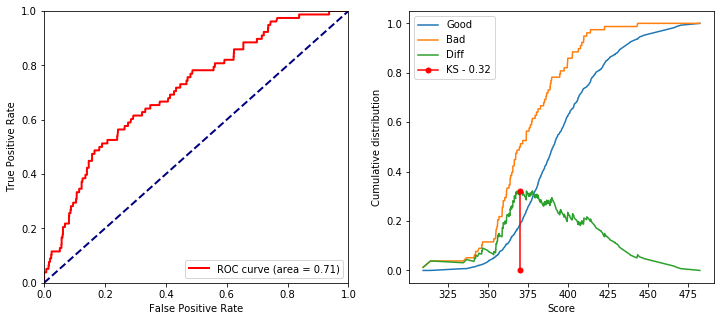

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
300-310,1,1,0,0,1,1,1.000000,1.000000,0.999309
310-320,3,4,1,1,2,3,0.666667,0.750000,0.997238
320-330,4,8,4,5,0,3,0.000000,0.375000,0.994475
330-340,11,19,10,15,1,4,0.090909,0.210526,0.986878
340-350,41,60,36,51,5,9,0.121951,0.150000,0.958564
350-360,86,146,73,124,13,22,0.151163,0.150685,0.899171
360-370,150,296,133,257,17,39,0.113333,0.131757,0.795580
370-380,202,498,192,449,10,49,0.049505,0.098394,0.656077
380-390,237,735,225,674,12,61,0.050633,0.082993,0.492403



 All  Sample 



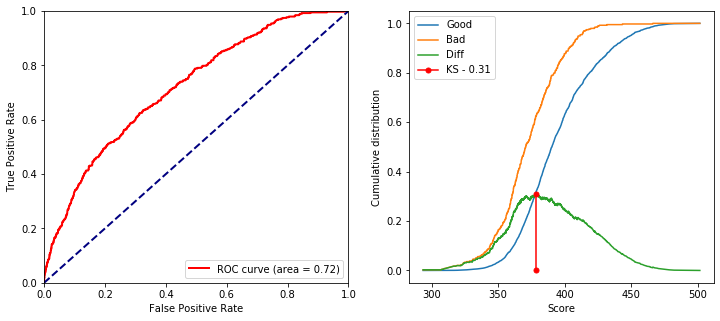

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
290-300,1,1,0,0,1,1,1.000000,1.000000,0.999862
300-310,5,6,3,3,2,3,0.400000,0.500000,0.999171
310-320,8,14,3,6,5,8,0.625000,0.571429,0.998065
320-330,28,42,21,27,7,15,0.250000,0.357143,0.994196
330-340,58,100,45,72,13,28,0.224138,0.280000,0.986182
340-350,189,289,154,226,35,63,0.185185,0.217993,0.960066
350-360,413,702,362,588,51,114,0.123487,0.162393,0.902998
360-370,814,1516,736,1324,78,192,0.095823,0.126649,0.790521
370-380,1040,2556,981,2305,59,251,0.056731,0.098200,0.646815



 Method 3:  BE 0.1 


 Train  Sample 



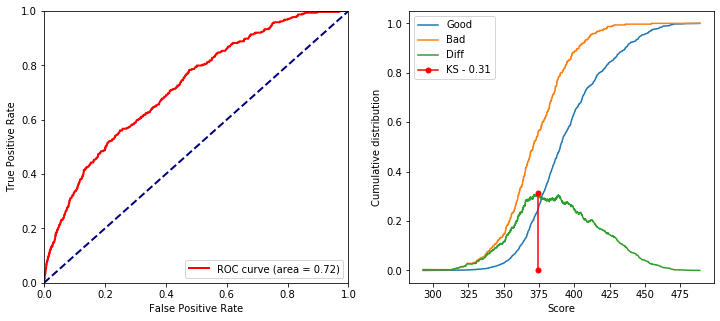

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
290-300,1,1,0,0,1,1,1.000000,1.000000,0.999827
300-310,3,4,3,3,0,1,0.000000,0.250000,0.999309
310-320,5,9,2,5,3,4,0.600000,0.444444,0.998445
320-330,20,29,14,19,6,10,0.300000,0.344828,0.994990
330-340,55,84,40,59,15,25,0.272727,0.297619,0.985490
340-350,125,209,104,163,21,46,0.168000,0.220096,0.963897
350-360,335,544,289,452,46,92,0.137313,0.169118,0.906029
360-370,684,1228,623,1075,61,153,0.089181,0.124593,0.787874
370-380,850,2078,806,1881,44,197,0.051765,0.094803,0.641043



 Test  Sample 



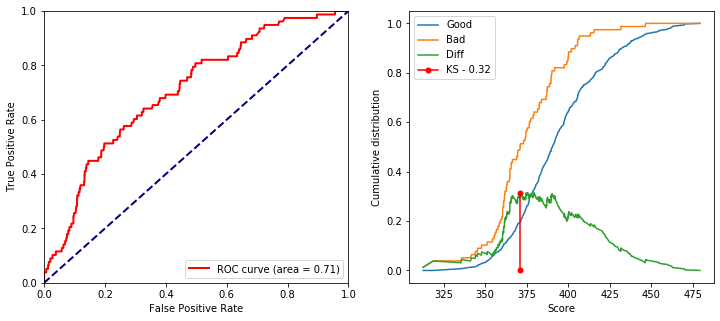

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
310-320,3,3,0,0,3,3,1.000000,1.000000,0.997928
320-330,4,7,4,4,0,3,0.000000,0.428571,0.995166
330-340,11,18,10,14,1,4,0.090909,0.222222,0.987569
340-350,35,53,31,45,4,8,0.114286,0.150943,0.963398
350-360,84,137,76,121,8,16,0.095238,0.116788,0.905387
360-370,160,297,138,259,22,38,0.137500,0.127946,0.794890
370-380,214,511,202,461,12,50,0.056075,0.097847,0.647099
380-390,230,741,218,679,12,62,0.052174,0.083671,0.488260
390-400,208,949,203,882,5,67,0.024038,0.070601,0.344613



 All  Sample 



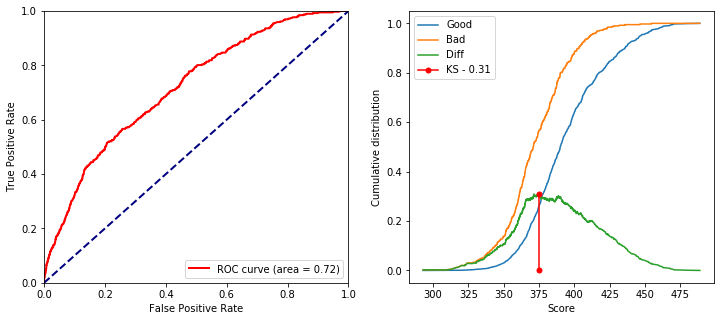

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
290-300,1,1,0,0,1,1,1.000000,1.000000,0.999862
300-310,3,4,3,3,0,1,0.000000,0.250000,0.999447
310-320,8,12,2,5,6,7,0.750000,0.583333,0.998342
320-330,24,36,18,23,6,13,0.250000,0.361111,0.995026
330-340,66,102,50,73,16,29,0.242424,0.284314,0.985906
340-350,160,262,135,208,25,54,0.156250,0.206107,0.963797
350-360,419,681,365,573,54,108,0.128878,0.158590,0.905900
360-370,844,1525,761,1334,83,191,0.098341,0.125246,0.789277
370-380,1064,2589,1008,2342,56,247,0.052632,0.095404,0.642255



 Method 4:  BE 0.05 


 Train  Sample 



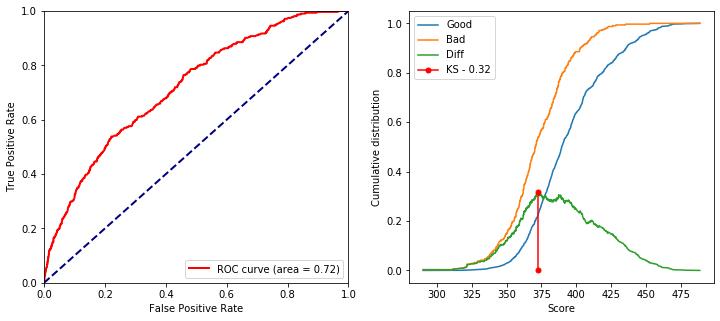

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
290-300,1,1,0,0,1,1,1.000000,1.000000,0.999827
300-310,1,2,1,1,0,1,0.000000,0.500000,0.999655
310-320,7,9,5,6,2,3,0.285714,0.333333,0.998445
320-330,24,33,15,21,9,12,0.375000,0.363636,0.994300
330-340,52,85,40,61,12,24,0.230769,0.282353,0.985317
340-350,120,205,97,158,23,47,0.191667,0.229268,0.964588
350-360,343,548,300,458,43,90,0.125364,0.164234,0.905338
360-370,651,1199,590,1048,61,151,0.093702,0.125938,0.792883
370-380,854,2053,809,1857,45,196,0.052693,0.095470,0.645362



 Test  Sample 



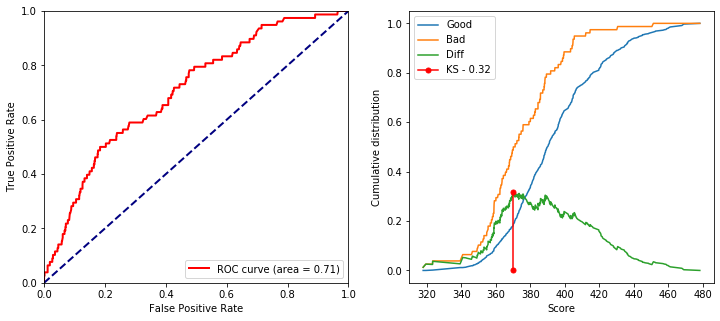

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
310-320,2,2,0,0,2,2,1.000000,1.000000,0.998619
320-330,8,10,7,7,1,3,0.125000,0.300000,0.993094
330-340,9,19,9,16,0,3,0.000000,0.157895,0.986878
340-350,30,49,25,41,5,8,0.166667,0.163265,0.966160
350-360,103,152,89,130,14,22,0.135922,0.144737,0.895028
360-370,135,287,119,249,16,38,0.118519,0.132404,0.801796
370-380,217,504,208,457,9,47,0.041475,0.093254,0.651934
380-390,242,746,227,684,15,62,0.061983,0.083110,0.484807
390-400,210,956,203,887,7,69,0.033333,0.072176,0.339779



 All  Sample 



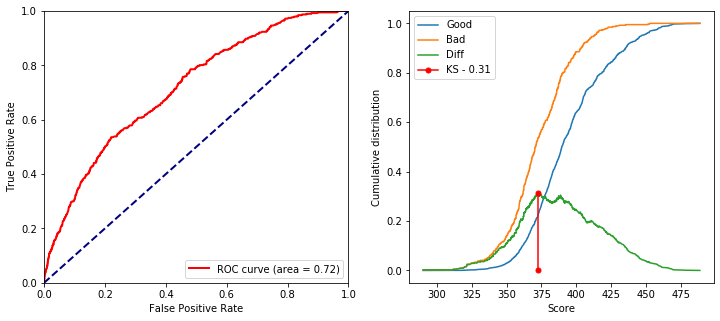

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
290-300,1,1,0,0,1,1,1.000000,1.000000,0.999862
300-310,1,2,1,1,0,1,0.000000,0.500000,0.999724
310-320,9,11,5,6,4,5,0.444444,0.454545,0.998480
320-330,32,43,22,28,10,15,0.312500,0.348837,0.994058
330-340,61,104,49,77,12,27,0.196721,0.259615,0.985629
340-350,150,254,122,199,28,55,0.186667,0.216535,0.964903
350-360,446,700,389,588,57,112,0.127803,0.160000,0.903275
360-370,786,1486,709,1297,77,189,0.097964,0.127187,0.794666
370-380,1071,2557,1017,2314,54,243,0.050420,0.095033,0.646677



 Method 5:  BE 0.01 


 Train  Sample 



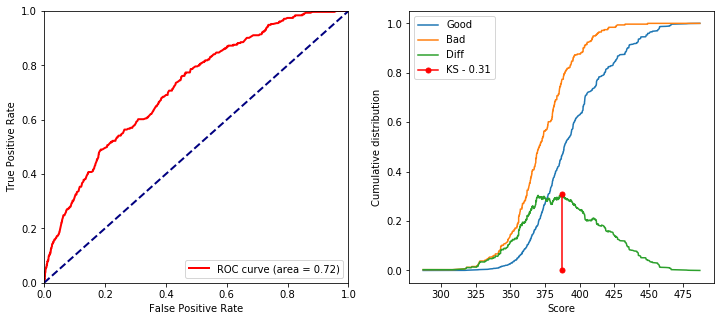

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
280-290,1,1,0,0,1,1,1.000000,1.000000,0.999827
290-300,0,1,0,0,0,1,NaN,1.000000,0.999827
300-310,1,2,1,1,0,1,0.000000,0.500000,0.999655
310-320,8,10,5,6,3,4,0.375000,0.400000,0.998273
320-330,22,32,14,20,8,12,0.363636,0.375000,0.994472
330-340,39,71,30,50,9,21,0.230769,0.295775,0.987735
340-350,123,194,99,149,24,45,0.195122,0.231959,0.966488
350-360,350,544,308,457,42,87,0.120000,0.159926,0.906029
360-370,621,1165,555,1012,66,153,0.106280,0.131330,0.798756



 Test  Sample 



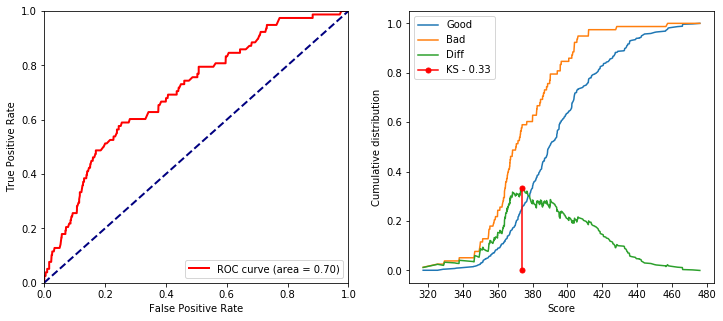

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
310-320,2,2,1,1,1,1,0.500000,0.500000,0.998619
320-330,8,10,6,7,2,3,0.250000,0.300000,0.993094
330-340,8,18,7,14,1,4,0.125000,0.222222,0.987569
340-350,26,44,22,36,4,8,0.153846,0.181818,0.969613
350-360,95,139,85,121,10,18,0.105263,0.129496,0.904006
360-370,145,284,125,246,20,38,0.137931,0.133803,0.803867
370-380,219,503,210,456,9,47,0.041096,0.093439,0.652624
380-390,249,752,236,692,13,60,0.052209,0.079787,0.480663
390-400,186,938,180,872,6,66,0.032258,0.070362,0.352210



 All  Sample 



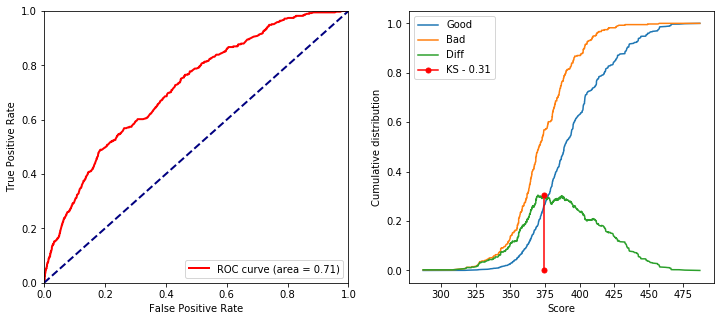

,Count,Cum. count,Goods,Cum. goods,Bads,Cum. bads,Marginal badrate,Cum. badrate,Approval rate
Score,,,,,,,,,
280-290,1,1,0,0,1,1,1.000000,1.000000,0.999862
290-300,0,1,0,0,0,1,NaN,1.000000,0.999862
300-310,1,2,1,1,0,1,0.000000,0.500000,0.999724
310-320,10,12,6,7,4,5,0.400000,0.416667,0.998342
320-330,30,42,20,27,10,15,0.333333,0.357143,0.994196
330-340,47,89,37,64,10,25,0.212766,0.280899,0.987702
340-350,149,238,121,185,28,53,0.187919,0.222689,0.967113
350-360,445,683,393,578,52,105,0.116854,0.153734,0.905624
360-370,766,1449,680,1258,86,191,0.112272,0.131815,0.799779



 Summary


,BE 0.2,BE 0.15,BE 0.1,BE 0.05,BE 0.01
AUC_Train,0.723836,0.721698,0.720393,0.718819,0.717293
KS_Train,0.319131,0.312821,0.312108,0.316847,0.309228
AUC_Test,0.711913,0.708670,0.707201,0.705554,0.704001
KS_Test,0.337189,0.322310,0.315010,0.316058,0.334269
AUC_All,0.721643,0.719178,0.717945,0.716207,0.714683
KS_All,0.316398,0.311048,0.309935,0.314969,0.306058


In [115]:
#这一步是判断三种变量输入方法下最终得到的变量是否一样，如果一样的话就不用全部输出了
varList = []
for method in methodDict:
    varList.append(methodDict[method][0])
if all(set(x) == set(varList[0]) for x in varList):
    methodList = [list(methodDict.keys())[0]]
else:
    methodList = list(methodDict.keys())

#开始输出
statsDict = {method:{} for method in methodList}
X_df = [X_train_df, X_test_df,X_all_df]
Y_df = [Y_train, Y_test, Y_all]
sample = ['Train','Test','All']
methodCnt = 0

factor = 28.85
offset = 300
sign = (' %d + '% offset if offset != 0 and factor > 0 else ' ')
print('\n', 'Score =' , sign, '%d * ln(P(Good) / P(Bad))' % factor,'\n')

for method in methodList:
    methodCnt += 1
    print('\n','Method %d: '% methodCnt,method,'\n')
    
    for i in range(len(sample)):
        print('\n',sample[i],' Sample','\n')
        enteredList = methodDict[method][0]
        logit = methodDict[method][1]
        X_reg = sm.add_constant(X_df[i][enteredList].values).astype(float)
        Y_pred = logit.predict(X_reg)    
        fpr,tpr,threshold = roc_curve(Y_df[i], Y_pred)
        roc_auc = auc(fpr,tpr)
        ks = max(abs(fpr-tpr))
    
        odds =   (1-threshold) / threshold
        scores = offset + factor * np.log(odds)
        
        #画ROC图
        plt.figure(figsize = (12,5))
        plt.subplot(1,2,1)
        plt.plot(fpr, tpr, color='r',
         lw = 2, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
        plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        
        #画KS
        plt.subplot(1,2,2)
        plt.plot(scores,fpr, label='Good')
        plt.plot(scores,tpr, label='Bad')
        plt.plot(scores,abs(fpr-tpr), label='Diff')
        # 标记ks
        ks_value = max(abs(fpr-tpr))
        idx = np.argwhere(abs(fpr-tpr) == ks_value)[0, 0]
        plt.plot((scores[idx], scores[idx]), (0, ks_value), label='KS - {:.2f}'.format(ks_value), 
                 color='r', marker='o', markerfacecolor='r', markersize=5)
        plt.xlabel('Score')
        plt.ylabel('Cumulative distribution')
        plt.legend()
        plt.show()
    
        statsDict[method]['AUC_'+sample[i]] = roc_auc
        statsDict[method]['KS_'+sample[i]] = ks
        
        #导出Gains chart
        gainsChart = pd.DataFrame(Y_df[i],columns = ['Bads'])
        gainsChart['Count'] = 1
        gainsChart['Goods'] = gainsChart['Count'] - gainsChart['Bads']
        gainsChart['Score'] = offset + factor * np.log((1 - Y_pred) / Y_pred)
        bins, labels = getBins(gainsChart['Score'],10)
        gainsChart['Score'] = pd.cut(gainsChart['Score'], bins = bins, labels = labels)
        gainsChart = gainsChart.groupby('Score').sum()
        gainsChart['Marginal badrate'] = gainsChart['Bads'] / gainsChart['Count']
        gainsChart['Cum. count'] = gainsChart['Count'].cumsum()
        gainsChart['Cum. goods'] = gainsChart['Goods'].cumsum()
        gainsChart['Cum. bads'] = gainsChart['Bads'].cumsum()
        gainsChart['Cum. badrate'] = gainsChart['Cum. bads'] / gainsChart['Cum. count']
        gainsChart['Approval rate'] = 1- gainsChart['Cum. count'] / gainsChart['Cum. count'][-1]
        gainsChart = gainsChart[['Count','Cum. count','Goods','Cum. goods','Bads','Cum. bads',
                                 'Marginal badrate','Cum. badrate','Approval rate']]
        display(gainsChart)
        
print('\n','Summary')
statsDf = pd.DataFrame(statsDict)
display(statsDf)

## 3. Final scorecard production

In [116]:
KSDf = statsDf.loc[['KS_Train','KS_Test'],:].T
KSDf['KS_Diff'] = abs(KSDf['KS_Train'] - KSDf['KS_Test'])
KSDf = KSDf.sort_values('KS_Diff')
bestMethod = KSDf.index[0]
print('Best method: ',bestMethod,', KS_diff = %.2f' % KSDf['KS_Diff'][0])
finalList = methodDict[bestMethod][0]
betas = methodDict[bestMethod][1].params
betaDf = pd.DataFrame(betas,index = ['const'] + finalList, columns = ['Beta']).T

Best method:  BE 0.05 , KS_diff = 0.00


In [117]:
n = len(finalList)
scoreCard_raw = pd.DataFrame(columns = ['Characteristic','Attribute','WOE','Score'])
for name in finalList:
    scoreCard_x = pd.DataFrame(woeMap[name], index = ['WOE']).T
    scoreCard_x = scoreCard_x.rename(columns = {'index':'Attribute'})
    scoreCard_x['Characteristic'] = name
    scoreCard_x['Score'] = - (scoreCard_x['WOE'].values * betaDf[name][0] + betaDf['const'][0] / n) * factor + offset / n
    if name in gpDict:
        if gpDict[name][0] == 'map':
            mapDf = pd.DataFrame(gpDict[name][1], index = ['Group']).T
            for group in scoreCard_x.index:
                scoreCard_x.loc[group,'Attribute'] = str(mapDf[mapDf.iloc[:,0] == group].index.to_list())
        elif gpDict[name][0] == 'bin':
            scoreCard_x['Attribute'] = pd.Series(scoreCard_x.index.to_list(),
                                                 index = scoreCard_x.index).apply(lambda  x: '[%s]' % x[2:-1])
    else:
        scoreCard_x['Attribute'] = scoreCard_x.index.to_list()
    scoreCard_raw = pd.concat([scoreCard_raw,scoreCard_x])
scoreCard_out = scoreCard_raw.reset_index().drop('index',axis = 1)[['Characteristic','Attribute','WOE','Score']]
scoreCard_out = scoreCard_out.set_index(['Characteristic','Attribute'])

In [118]:
scoreCard_out

WOE      Score
Characteristic Attribute                     
x5             [1-3]      0.120517  50.466727
               [2-6]      0.005359  47.958827
               [7-10]    -0.293316  41.454328
x28            0         -0.178990  42.703977
               1          0.165227  52.585192
x25            [<=23]     0.534496  65.153290
               [<=30]     0.108913  51.369568
               [<=43]    -0.156582  42.770775
               [<=53]     0.152250  52.773160
               [>53]     -0.719946  24.524677
x8             [1-4]      0.605724  67.630470
               [5-6]      0.254220  56.147218
               [7-8]      0.012167  48.239625
               [9-10]    -0.227108  40.422745
x20            [1]        0.078647  50.140253
               [2]       -0.914102  21.131295
               [3-5]     -1.166693  13.750377
x17            [10]       0.807548  67.512115
               [1-4]      0.186210  52.377764
               [5-6]     -0.102771  45.338856
               [7-9]     -0.173155  43.624479
x19            [1]        0.261225  53.357001
               [2]       -0.372657  39.974760
               [3-5]     -0.469775  37.924464
x12            [1]        1.586553  95.280392
               [2]        0.571538  64.931224
               [3]       -0.214929  41.415714
               [4]       -0.326315  38.085242
               [5, 6, 7] -0.433995  34.865583